**Testing on a Small Dataset**

This file we used to first test on a smaller synthetic dataset representative of what our larger dataset is.

In [17]:
import pandas as pd

# Data
data = {
    'Ink': ['Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue'],
    'Name': [
        'Bob - Slayer of Fish', 'Alice - Protector of Trees', 'Charlie - Bringer of Storms', 'Dave - Guardian of Shadows', 'Eve - Hunter of Stars',
        'Frank - Keeper of Secrets', 'Grace - Destroyer of Worlds', 'Hank - Seeker of Truth', 'Irene - Vanquisher of Flames', 'Jack - Master of Winds',
        'Karen - Herald of Thunder', 'Leo - Conqueror of Mountains', 'Molly - Defender of Oceans', 'Nate - Vanisher of Doubts', 'Olive - Watcher of Skies',
        'Paul - Defender of Realms', 'Quinn - Enforcer of Justice', 'Rose - Protector of Waters', 'Sam - Slayer of Myths', 'Tina - Keeper of Forests',
        'Uma - Bringer of Light', 'Vic - Guardian of Realms', 'Wendy - Seeker of Stars', 'Xavier - Master of Waves', 'Yara - Vanquisher of Shadows',
        'Zack - Herald of Flames', 'Anna - Conqueror of Depths', 'Ben - Defender of Earth', 'Clara - Hunter of Truths', 'Doug - Watcher of Storms',
        'Elle - Keeper of Secrets', 'Finn - Vanisher of Fears', 'Gina - Protector of Lands', 'Hank - Slayer of Darkness', 'Isla - Seeker of Knowledge',
        'John - Master of Winds', 'Kate - Vanquisher of Shadows', 'Luke - Herald of Thunder', 'Mia - Conqueror of Oceans', 'Noah - Defender of Flames',
        'Owen - Hunter of Justice', 'Pete - Watcher of Skies', 'Quinn - Keeper of Secrets', 'Ruby - Seeker of Truths', 'Seth - Bringer of Light',
        'Tina - Guardian of Shadows', 'Uma - Protector of Stars', 'Vic - Conqueror of Waves'
    ]
}

additional_data = {
    'Ink': [
        'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow',
        'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple',
        'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange',
        'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow',
        'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple', 'Orange', 'Yellow', 'Purple'
    ],
    'Name': [
        'Aaron - Master of Shadows', 'Becky - Slayer of Dragons', 'Carl - Protector of Whales', 'Dana - Seeker of Stars',
        'Eli - Guardian of Flames', 'Fiona - Conqueror of Lands', 'Gabe - Hunter of Beasts', 'Holly - Keeper of Secrets',
        'Ian - Defender of Realms', 'Jill - Master of Waves', 'Ken - Bringer of Storms', 'Lara - Vanquisher of Darkness',
        'Mason - Herald of Thunder', 'Nina - Protector of Trees', 'Oscar - Slayer of Myths', 'Pam - Watcher of Skies',
        'Quincy - Hunter of Stars', 'Rita - Keeper of Forests', 'Steve - Guardian of Oceans', 'Tara - Enforcer of Justice',
        'Ulysses - Seeker of Truths', 'Vera - Conqueror of Depths', 'Walt - Bringer of Light', 'Xena - Protector of Realms',
        'Yosef - Vanquisher of Flames', 'Zara - Herald of Shadows', 'Amber - Master of Skies', 'Blake - Hunter of Winds',
        'Cindy - Guardian of Lands', 'Dylan - Slayer of Beasts', 'Evan - Conqueror of Realms', 'Faith - Keeper of Flames',
        'Grant - Defender of Stars', 'Hailey - Protector of Mountains', 'Ivy - Seeker of Oceans', 'Jared - Bringer of Light',
        'Kara - Vanquisher of Beasts', 'Liam - Hunter of Secrets', 'Mona - Guardian of Stars', 'Nate - Master of Realms',
        'Olivia - Conqueror of Skies', 'Perry - Defender of Flames', 'Quinn - Keeper of Storms', 'Rose - Hunter of Shadows',
        'Sara - Enforcer of Truths', 'Terry - Seeker of Lands', 'Usha - Guardian of Depths', 'Victor - Slayer of Waves',
        'Will - Protector of Storms', 'Zane - Vanquisher of Realms'
    ]
}

data['Ink'].extend(additional_data['Ink'])
data['Name'].extend(additional_data['Name'])

# Create DataFrame
df = pd.DataFrame(data)
card_to_ink = pd.Series(df.Ink.values, index=df.Name).to_dict()

# Display DataFrame
print(df)


       Ink                         Name
0      Red         Bob - Slayer of Fish
1    Green   Alice - Protector of Trees
2     Blue  Charlie - Bringer of Storms
3      Red   Dave - Guardian of Shadows
4    Green        Eve - Hunter of Stars
..     ...                          ...
93  Yellow      Terry - Seeker of Lands
94  Purple    Usha - Guardian of Depths
95  Orange     Victor - Slayer of Waves
96  Yellow   Will - Protector of Storms
97  Purple  Zane - Vanquisher of Realms

[98 rows x 2 columns]


In [18]:
import requests

This was added after testing with the smaller dataset to import our full dataset.

In [19]:
# API endpoint for fetching all cards
url = "https://api.lorcana-api.com/cards/all"

# Making a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response to a pandas DataFrame
    data = response.json()
    df = pd.DataFrame(data)

    # Ensure lore, strength, and willpower columns contain numerical values
    numeric_cols = ['Lore', 'Strength', 'Willpower']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
    df.rename(columns={'Color': 'Ink'}, inplace=True)


    # Print the DataFrame

else:
    print("Failed to fetch data. Status code:", response.status_code)

card_to_ink = pd.Series(df.Ink.values, index=df.Name).to_dict()

df

Artist           Set_Name     Classifications  \
0                    Cam Kendell  Into the Inklands     Dreamborn, Hero   
1                Jacob McAlister  Into the Inklands     Storyborn, Hero   
2    Evana Kisa, Jochem van Gool  Into the Inklands  Storyborn, Villain   
3                          Kapik  Into the Inklands    Storyborn, Puppy   
4               Jeanne Plounevez  Into the Inklands     Storyborn, Ally   
..                           ...                ...                 ...   
607           Simangaliso Sibaya  The First Chapter                 NaN   
608               Samanta Erdini  The First Chapter                 NaN   
609                 Kamil Murzyn  The First Chapter                 NaN   
610                 Dav Augereau  The First Chapter                 NaN   
611                  Oleg Yurkov  The First Chapter                 NaN   

     Abilities  Set_Num    Ink Franchise  \
0    Bodyguard        3  Amber             
1          NaN        3  Amber             
2          NaN        3  Amber             
3          NaN        3  Amber             
4    Bodyguard        3  Amber             
..         ...      ...    ...       ...   
607        NaN        1  Steel             
608        NaN        1  Steel             
609        NaN        1  Steel             
610  Bodyguard        1  Steel             
611        NaN        1  Steel             

                                                 Image  Cost  Inkable  ...  \
0    https://lorcana-api.com/images/baloo/von_bruin...     3    False  ...   
1    https://lorcana-api.com/images/bernard/brand-n...     4     True  ...   
2    https://lorcana-api.com/images/chernabog/evild...    10    False  ...   
3    https://lorcana-api.com/images/dalmatian_puppy...     2     True  ...   
4    https://lorcana-api.com/images/joshua_sweet/th...     4     True  ...   
..                                                 ...   ...      ...  ...   
607  https://lorcana-api.com/images/smash/smash-lar...     3     True  ...   
608  https://lorcana-api.com/images/beast's_mirror/...     2     True  ...   
609  https://lorcana-api.com/images/frying_pan/fryi...     2     True  ...   
610  https://lorcana-api.com/images/musketeer_tabar...     4    False  ...   
611  https://lorcana-api.com/images/plasma_blaster/...     3    False  ...   

         Rarity Unique_ID  Card_Num  \
0          Rare   INK-001         1   
1          Rare   INK-002         2   
2    Super Rare   INK-003         3   
3        Common   INK-004         4   
4        Common   INK-005         5   
..          ...       ...       ...   
607    Uncommon   TFC-200       200   
608      Common   TFC-201       201   
609    Uncommon   TFC-202       202   
610        Rare   TFC-203       203   
611        Rare   TFC-204       204   

                                             Body_Text Willpower  Strength  \
0    Bodyguard (This character may enter play exert...       3.0       0.0   
1    I'll Check It Out - At the end of your turn, i...       5.0       1.0   
2    The Power Of Evil - For each character card in...       9.0       9.0   
3    Where Did They All Come From? - You may have u...       3.0       2.0   
4    Bodyguard (This character may enter play exert...       5.0       1.0   
..                                                 ...       ...       ...   
607                 Deal 3 damage to chosen character.       0.0       0.0   
608  Show Me - {e}, 3 {i} - If you have no cards in...       0.0       0.0   
609  Clang! - Banish this item - Chosen character c...       0.0       0.0   
610  All For One And One For All - Whenever one of ...       0.0       0.0   
611  Quick Shot - {e}, 2 {i}: Deal 1 damage to chos...       0.0       0.0   

    Set_ID                                        Flavor_Text  \
0      INK                                                NaN   
1      INK    "You stay there. I'll look for scattered lore."   
2      INK               Darkness calls to minions everywh

This code is from preprocessing. It creates a text file full of valid decks.

In [20]:
import random
import pandas as pd

df_card_db = df.copy()
def create_deck(df_card_db, num_cards=60, num_decks=1, file_path='decks.txt'):
    # Get the unique card IDs and their 'Ink' types
    unique_cards = df_card_db[['Name', 'Ink']].drop_duplicates().reset_index(drop=True)

    # Open file to write the decks
    with open(file_path, 'w') as file:
        for _ in range(num_decks):
            # Select two unique 'Ink' types randomly from available types
            available_inks = list(unique_cards['Ink'].unique())
            chosen_inks = random.sample(available_inks, 2)

            # Filter cards to only those that have the chosen 'Ink' types
            filtered_cards = unique_cards[unique_cards['Ink'].isin(chosen_inks)]

            # Get the unique card names from the filtered list
            unique_indices = list(filtered_cards['Name'])

            # Create an empty list
            deck = []

            while len(deck) < num_cards:
                chosen_index = random.choice(unique_indices)
                # Determine how many times this card can be added without exceeding num_cards
                max_replicate = min(4, num_cards - len(deck))
                replicate_times = random.randint(1, max_replicate)

                for _ in range(replicate_times):
                    deck.append(chosen_index)
                    if len(deck) == num_cards:
                        break

            # Convert deck to a single string line
            deck_line = ','.join(deck)
            # Write deck line to file
            file.write(deck_line + '\n')

# Example usage: Create 5 decks and save them into 'decks.txt'
create_deck(df_card_db, num_cards=60, num_decks=1000, file_path='decks.txt')


Again from preprocessing, this reads the decks from the file into a list

In [21]:
def read_decks_from_file(file_path):
    # List to hold all decks
    all_decks = []

    # Open the file and read line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Remove any trailing newline characters and split the line by commas
            deck = line.strip().split(',')
            # Add the list of cards to the all_decks list
            all_decks.append(deck)

    return all_decks

# Example usage
file_path = 'decks.txt'  # Path to your file containing the decks
decks = read_decks_from_file(file_path)
print(decks[1])


['Prince John - Phony King', 'Prince John - Greediest of All', 'Pongo - Determined Father', 'Healing Glow', 'Healing Glow', 'Healing Glow', 'Healing Glow', 'I Will Find My Way', 'Wildcat - Mechanic', 'Rapunzel - Gifted with Healing', "World's Greatest Criminal Mind", 'Friar Tuck - Priest of Nottingham', 'Friar Tuck - Priest of Nottingham', 'Friar Tuck - Priest of Nottingham', 'Tamatoa - Drab Little Crab', 'Timon - Grub Rustler', 'Timon - Grub Rustler', 'Timon - Grub Rustler', 'Timon - Grub Rustler', 'Starlight Vial', 'Starlight Vial', 'I Will Find My Way', 'I Will Find My Way', 'Doc - Leader of the Seven Dwarfs', 'Doc - Leader of the Seven Dwarfs', 'Doc - Leader of the Seven Dwarfs', 'Doc - Leader of the Seven Dwarfs', 'Ariel - On Human Legs', 'Ariel - On Human Legs', 'Ariel - On Human Legs', 'Mufasa - Betrayed Leader', 'Mufasa - Betrayed Leader', 'Mufasa - Betrayed Leader', 'Duke Of Weselton - Opportunistic Official', 'Mr. Snoops - Inept Businessman', 'Mr. Snoops - Inept Businessman',

In [22]:
decks

[['Hans - Scheming Prince',
  'Hans - Scheming Prince',
  'Hans - Scheming Prince',
  'Painting the Roses Red',
  'Painting the Roses Red',
  'Painting the Roses Red',
  'Snow White - Unexpected Houseguest',
  'Belle - Bookworm',
  'Belle - Bookworm',
  'Belle - Bookworm',
  'Belle - Bookworm',
  'Sir Hiss - Aggravating Asp',
  'Sir Hiss - Aggravating Asp',
  "Sleepy's Flute",
  "Sleepy's Flute",
  'Bashful - Hopeless Romantic',
  'Bashful - Hopeless Romantic',
  'Bashful - Hopeless Romantic',
  'Cruella De Vil - Miserable as Usual',
  'Cruella De Vil - Miserable as Usual',
  'Mickey Mouse - Friendly Face',
  'Stolen Scimitar',
  'Stolen Scimitar',
  'Enchantress - Unexpected Judge',
  'Enchantress - Unexpected Judge',
  'Enchantress - Unexpected Judge',
  'Enchantress - Unexpected Judge',
  'Panic - Underworld Imp',
  'Panic - Underworld Imp',
  'Panic - Underworld Imp',
  'Peter Pan - Never Landing',
  'Peter Pan - Never Landing',
  'Peter Pan - Never Landing',
  'Gaston - Scheming S

# LSTM

Here we are using an LSTM and trying to see if encoding the cards works better than processing them straight from text

In [23]:
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Encode the decks as sequences of integers
encoded_decks = [[card_to_int[card] for card in deck] for deck in decks]

# Print the first few encoded decks
for i, deck in enumerate(encoded_decks[:5]):
    print(f"Deck {i + 1}: {deck}")

Deck 1: [86, 86, 86, 283, 283, 283, 175, 143, 143, 143, 143, 107, 107, 596, 596, 435, 435, 435, 301, 301, 494, 113, 113, 383, 383, 383, 383, 272, 272, 272, 14, 14, 14, 276, 276, 276, 438, 438, 438, 240, 505, 505, 471, 226, 226, 226, 257, 257, 380, 380, 93, 93, 93, 93, 204, 605, 605, 483, 483, 483]
Deck 2: [584, 340, 233, 571, 571, 571, 571, 165, 560, 266, 325, 198, 198, 198, 219, 35, 35, 35, 35, 413, 413, 165, 165, 319, 319, 319, 319, 578, 578, 578, 58, 58, 58, 307, 34, 34, 34, 34, 114, 114, 114, 114, 340, 340, 340, 340, 512, 512, 237, 237, 237, 257, 257, 257, 600, 600, 272, 272, 397, 373]
Deck 3: [394, 537, 537, 537, 537, 503, 503, 41, 41, 380, 380, 380, 380, 164, 164, 164, 393, 595, 595, 510, 345, 345, 345, 267, 267, 267, 267, 470, 545, 545, 545, 49, 49, 49, 49, 76, 76, 76, 352, 324, 324, 324, 324, 539, 539, 539, 467, 467, 467, 245, 130, 130, 130, 130, 511, 67, 67, 67, 67, 304]
Deck 4: [297, 297, 297, 511, 511, 510, 149, 149, 149, 149, 262, 501, 242, 242, 242, 242, 59, 59, 59, 321, 3

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_deck_length = max(len(deck) for deck in encoded_decks)
vocab_size = len(unique_cards)

# Pad sequences to the same length
encoded_decks_padded = pad_sequences(encoded_decks, maxlen=max_deck_length, padding='post')

# Model architecture
input_seq = Input(shape=(max_deck_length,))
embedding = Embedding(vocab_size, 64)(input_seq)
lstm = LSTM(128, return_sequences=True)(embedding)
output = Dense(vocab_size, activation='softmax')(lstm)

model = Model(input_seq, output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Prepare the target data
target_data = []
for deck in encoded_decks_padded:
    target_data.append(deck[1:])  # Shift the input sequence by one
target_data = pad_sequences(target_data, maxlen=max_deck_length, padding='post')

# Reshape target data to match output shape
target_data = target_data.reshape((len(encoded_decks_padded), max_deck_length, 1))

# Train the model
model.fit(encoded_decks_padded, target_data, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 6s 120ms/step - loss: 6.4020
Epoch 2/10
32/32 [==============================] - 2s 51ms/step - loss: 6.3413
Epoch 3/10
32/32 [==============================] - 2s 55ms/step - loss: 6.3196
Epoch 4/10
32/32 [==============================] - 1s 26ms/step - loss: 6.2980
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 6.2479
Epoch 6/10
32/32 [==============================] - 1s 21ms/step - loss: 6.1103
Epoch 7/10
32/32 [==============================] - 1s 20ms/step - loss: 5.9298
Epoch 8/10
32/32 [==============================] - 1s 16ms/step - loss: 5.7562
Epoch 9/10
32/32 [==============================] - 0s 16ms/step - loss: 5.5998
Epoch 10/10
32/32 [==============================] - 1s 25ms/step - loss: 5.4687


This here generates a deck based on the LSTM model. It doesn't do very well and runs into the problem where it gets the same card over and over

In [29]:
import numpy as np

def generate_deck(model, card_to_int, int_to_card, max_length, start_token):
    generated = [start_token]
    for _ in range(max_length - 1):
        input_seq = pad_sequences([generated], maxlen=max_length, padding='post')
        preds = model.predict(input_seq, verbose=0)
        next_card = np.argmax(preds[0, len(generated) - 1])
        generated.append(next_card)
    return [int_to_card[i] for i in generated]

# Generate a new deck
start_token = card_to_int['Goofy - Musketeer']  # Example start token
new_deck = generate_deck(model, card_to_int, int_to_card, max_deck_length, start_token)
print(new_deck)


['Goofy - Musketeer', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Hades - Lord of the Under

# Another LSTM

Here we tried another lstm processing similarly to above

In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Encode the decks as sequences of integers
encoded_decks = [[card_to_int[card] for card in deck] for deck in decks]

# Pad sequences to the same length
max_deck_length = max(len(deck) for deck in encoded_decks)
encoded_decks_padded = pad_sequences(encoded_decks, maxlen=max_deck_length, padding='post')

# Print the first few encoded decks
for i, deck in enumerate(encoded_decks_padded[:5]):
    print(f"Deck {i + 1}: {deck}")


Deck 1: [ 86  86  86 283 283 283 175 143 143 143 143 107 107 596 596 435 435 435
 301 301 494 113 113 383 383 383 383 272 272 272  14  14  14 276 276 276
 438 438 438 240 505 505 471 226 226 226 257 257 380 380  93  93  93  93
 204 605 605 483 483 483]
Deck 2: [584 340 233 571 571 571 571 165 560 266 325 198 198 198 219  35  35  35
  35 413 413 165 165 319 319 319 319 578 578 578  58  58  58 307  34  34
  34  34 114 114 114 114 340 340 340 340 512 512 237 237 237 257 257 257
 600 600 272 272 397 373]
Deck 3: [394 537 537 537 537 503 503  41  41 380 380 380 380 164 164 164 393 595
 595 510 345 345 345 267 267 267 267 470 545 545 545  49  49  49  49  76
  76  76 352 324 324 324 324 539 539 539 467 467 467 245 130 130 130 130
 511  67  67  67  67 304]
Deck 4: [297 297 297 511 511 510 149 149 149 149 262 501 242 242 242 242  59  59
  59 321 321 321 321 189 189 367 367  92 304 304 304 362 362 401 401 401
 414 414 414 414 414 414 414 414 592 592 592 592 239 239 239 239 606 606
 606 386 386 3

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Model

# Model parameters
vocab_size = len(card_to_int) + 1  # +1 for padding token

# Define the seq2seq model
input_seq = Input(shape=(max_deck_length,))
embedding = Embedding(vocab_size, 64)(input_seq)
lstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)
output = Dense(vocab_size, activation='softmax')(lstm)

model = Model(input_seq, output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Prepare the target data
target_data = np.roll(encoded_decks_padded, -1, axis=1)

# Reshape target data to match output shape
target_data = np.expand_dims(target_data, -1)

# Train the model
model.fit(encoded_decks_padded, target_data, epochs=10, batch_size=32)


Epoch 1/10
32/32 [==============================] - 7s 123ms/step - loss: 6.4005
Epoch 2/10
32/32 [==============================] - 2s 67ms/step - loss: 6.2896
Epoch 3/10
32/32 [==============================] - 1s 43ms/step - loss: 5.9278
Epoch 4/10
32/32 [==============================] - 1s 18ms/step - loss: 5.3071
Epoch 5/10
32/32 [==============================] - 1s 29ms/step - loss: 4.4180
Epoch 6/10
32/32 [==============================] - 1s 23ms/step - loss: 3.3987
Epoch 7/10
32/32 [==============================] - 0s 13ms/step - loss: 2.4541
Epoch 8/10
32/32 [==============================] - 0s 14ms/step - loss: 1.7282
Epoch 9/10
32/32 [==============================] - 1s 24ms/step - loss: 1.2516
Epoch 10/10
32/32 [==============================] - 0s 14ms/step - loss: 0.9634


This has worse results, and only provides the start token, it doesn't generate any new ones cards.

In [33]:
def generate_deck(model, card_to_int, int_to_card, max_length, start_token):
    generated = [start_token]
    for _ in range(max_length - 1):
        input_seq = pad_sequences([generated], maxlen=max_length, padding='post')
        preds = model.predict(input_seq, verbose=0)
        next_token = np.argmax(preds[0, len(generated) - 1])
        generated.append(next_token)
    return [int_to_card[token] for token in generated if token != 0]

# Generate a new deck
start_token = card_to_int['Goofy - Musketeer']  # Example start token
new_deck = generate_deck(model, card_to_int, int_to_card, max_deck_length, start_token)
print(new_deck)


['Goofy - Musketeer']


# Multi Label Classification

At this point we figured that we could try just a regular autoencoder

In [34]:
import numpy as np
import pandas as pd

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Encode the decks as frequency vectors
encoded_decks = []
for deck in decks:
    deck_vector = np.zeros(len(unique_cards))
    for card in deck:
        deck_vector[card_to_int[card]] += 1
    encoded_decks.append(deck_vector)

# Convert to DataFrame for easy viewing
df_encoded = pd.DataFrame(encoded_decks, columns=unique_cards)
print(df_encoded.head())


   Maid Marian - Delightful Dreamer  Cleansing Rainwater  \
0                               0.0                  0.0   
1                               0.0                  0.0   
2                               0.0                  0.0   
3                               0.0                  0.0   
4                               0.0                  0.0   

   Chief Tui - Respected Leader  Judy Hopps - Optimistic Officer  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   
3                           0.0                              0.0   
4                           0.0                              0.0   

   The Boss Is On A Roll  Flynn Rider - His Own Biggest Fan  \
0                    0.0                                0.0   
1                    0.0                                0.0   
2                    0.0                 

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data
X = np.array(encoded_decks)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=len(unique_cards), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(unique_cards), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
model.fit(X, X, epochs=100, batch_size=10, verbose=2)


Epoch 1/100
100/100 - 2s - loss: 0.3873 - 2s/epoch - 19ms/step
Epoch 2/100
100/100 - 0s - loss: 0.2873 - 201ms/epoch - 2ms/step
Epoch 3/100
100/100 - 0s - loss: 0.2143 - 213ms/epoch - 2ms/step
Epoch 4/100
100/100 - 0s - loss: 0.1627 - 199ms/epoch - 2ms/step
Epoch 5/100
100/100 - 0s - loss: 0.1167 - 199ms/epoch - 2ms/step
Epoch 6/100
100/100 - 0s - loss: 0.0631 - 199ms/epoch - 2ms/step
Epoch 7/100
100/100 - 0s - loss: -5.2762e-03 - 200ms/epoch - 2ms/step
Epoch 8/100
100/100 - 0s - loss: -9.0636e-02 - 216ms/epoch - 2ms/step
Epoch 9/100
100/100 - 0s - loss: -2.0538e-01 - 200ms/epoch - 2ms/step
Epoch 10/100
100/100 - 0s - loss: -3.6130e-01 - 198ms/epoch - 2ms/step
Epoch 11/100
100/100 - 0s - loss: -5.6828e-01 - 199ms/epoch - 2ms/step
Epoch 12/100
100/100 - 0s - loss: -8.4101e-01 - 200ms/epoch - 2ms/step
Epoch 13/100
100/100 - 0s - loss: -1.1973e+00 - 198ms/epoch - 2ms/step
Epoch 14/100
100/100 - 0s - loss: -1.6323e+00 - 199ms/epoch - 2ms/step
Epoch 15/100
100/100 - 0s - loss: -2.1752e+00 -

This ended up getting no cards though :/

In [36]:
def generate_new_deck(model, int_to_card, num_cards=60, threshold=0.5):
    # Predict a new deck composition
    new_deck_vector = model.predict(np.random.rand(1, len(int_to_card)))[0]

    # Sample cards based on predicted frequencies
    new_deck = []
    for idx, freq in enumerate(new_deck_vector):
        if freq > threshold:
            new_deck.extend([int_to_card[idx]] * int(freq * num_cards))

    # Ensure the deck has the exact number of cards needed
    new_deck = new_deck[:num_cards]

    return new_deck

# Generate a new deck
new_deck = generate_new_deck(model, int_to_card, num_cards=60, threshold=0.00045)
print(new_deck)


1/1 [==============================] - 0s 141ms/step
[]


# VAE **(Best so far)**

Now we tried a Variational Autoencoder!!!!

On the smaller dataset it had good results

In [66]:
import numpy as np
from collections import Counter

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Encode the decks as frequency vectors
encoded_decks = []
for deck in decks:
    deck_counts = Counter(deck)
    deck_vector = np.zeros(len(unique_cards))
    for card, count in deck_counts.items():
        deck_vector[card_to_int[card]] = count / 4  # Normalize to [0, 1] assuming max count is 4
    encoded_decks.append(deck_vector)

# Convert to numpy array
encoded_decks = np.array(encoded_decks)


In [67]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Define VAE parameters
input_dim = len(unique_cards)
latent_dim = 2  # Dimensionality of the latent space

# Define sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Encoder network
inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(128, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Define VAE model
vae = Model(inputs, x_decoded_mean)

# Define VAE loss
xent_loss = input_dim * tf.keras.losses.binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(encoded_decks, epochs=100, batch_size=10, verbose=2)


Epoch 1/100
100/100 - 2s - loss: 206.2085 - 2s/epoch - 16ms/step
Epoch 2/100
100/100 - 0s - loss: 82.9811 - 252ms/epoch - 3ms/step
Epoch 3/100
100/100 - 0s - loss: 77.7784 - 256ms/epoch - 3ms/step
Epoch 4/100
100/100 - 0s - loss: 75.9550 - 253ms/epoch - 3ms/step
Epoch 5/100
100/100 - 0s - loss: 74.8957 - 261ms/epoch - 3ms/step
Epoch 6/100
100/100 - 0s - loss: 74.2970 - 251ms/epoch - 3ms/step
Epoch 7/100
100/100 - 0s - loss: 73.5208 - 252ms/epoch - 3ms/step
Epoch 8/100
100/100 - 0s - loss: 72.8068 - 257ms/epoch - 3ms/step
Epoch 9/100
100/100 - 0s - loss: 71.9958 - 270ms/epoch - 3ms/step
Epoch 10/100
100/100 - 0s - loss: 71.3586 - 254ms/epoch - 3ms/step
Epoch 11/100
100/100 - 0s - loss: 71.0131 - 253ms/epoch - 3ms/step
Epoch 12/100
100/100 - 0s - loss: 70.7409 - 255ms/epoch - 3ms/step
Epoch 13/100
100/100 - 0s - loss: 70.5610 - 255ms/epoch - 3ms/step
Epoch 14/100
100/100 - 0s - loss: 70.3873 - 253ms/epoch - 3ms/step
Epoch 15/100
100/100 - 0s - loss: 70.2636 - 246ms/epoch - 2ms/step
Epoch

This sometimes gives us a deck, but also sometimes nothing at all!

In [70]:
# Define a separate encoder model to map input decks to the latent space
encoder = Model(inputs, z_mean)

# Define a separate decoder model to map latent space points to decks
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
decoder = Model(decoder_input, _x_decoded_mean)

def generate_new_deck(decoder, int_to_card, num_cards=60):
    # Sample a point from the latent space
    z_sample = np.random.normal(size=(1, latent_dim))

    # Decode the point to get a new deck
    decoded_vector = decoder.predict(z_sample)[0]

    # Denormalize the predicted values to get counts
    new_deck_counts = np.round(decoded_vector * 4).astype(int)

    # Generate the deck based on the counts
    new_deck = []
    for idx, count in enumerate(new_deck_counts):
        new_deck.extend([int_to_card[idx]] * count)

    # Ensure the deck has the exact number of cards needed
    new_deck = new_deck[:num_cards]

    return new_deck

# Generate a new deck
new_deck = generate_new_deck(decoder, int_to_card, num_cards=60)
print(new_deck)


1/1 [==============================] - 0s 46ms/step
['Tigger - One Of A Kind', 'Jim Hawkins - Thrill Seeker', 'Dragon Fire', 'Rapunzel - Letting Down Her Hair', 'Donald Duck - Not Again!', 'Maui - Soaring Demigod', 'Agrabah - Marketplace']


These are just to check and see if the deck is valid

In [40]:
def extract_inks_from_deck(deck_list, df_card_db):
    # Create a DataFrame from the deck list for easy handling
    deck_df = pd.DataFrame(deck_list, columns=['Name'])

    # Merge deck_df with df_card_db to match 'Ink' to each card
    merged_df = deck_df.merge(df_card_db, on='Name', how='left')

    # Extract the unique 'Ink' values
    unique_inks = merged_df['Ink'].unique()
    return unique_inks
# Example usage
deck_string = new_deck
unique_inks = extract_inks_from_deck(deck_string, df_card_db)
print("Unique Inks in the Deck:", unique_inks)


Unique Inks in the Deck: ['Emerald']


In [41]:
# Create a mapping from card names to ink values
card_to_ink = pd.Series(df.Ink.values, index=df.Name).to_dict()


You can see from the model below that it has issues with giving consistent deck lengths. It does actually give decent results when it gives us a full deck though!

In [42]:
import numpy as np
from collections import Counter

# Function to get the ink color distribution of a deck
def get_ink_colors(deck, card_to_ink):
    ink_colors = [card_to_ink.get(card, 'Unknown') for card in deck]  # Use 'Unknown' if card not found
    return set(ink_colors)

# Function to check the properties of a deck
def analyze_deck(deck, card_to_ink):
    if not deck:
        print("Empty deck encountered!")
        return 0, 0, 0  # Return 0 ink colors, 0 max count, and length 0 for empty decks

    ink_colors = get_ink_colors(deck, card_to_ink)
    num_ink_colors = len(ink_colors)

    # Count the occurrences of each card
    card_counts = Counter(deck)
    max_count_per_card = max(card_counts.values()) if card_counts else 0

    return num_ink_colors, max_count_per_card, len(deck)

# Function to generate multiple decks and analyze them
def analyze_generated_decks(decoder, int_to_card, card_to_ink, num_decks=100, num_cards=60):
    generated_decks = [generate_new_deck(decoder, int_to_card, num_cards=num_cards) for _ in range(num_decks)]

    decks_with_too_many_ink_colors = 0
    decks_with_too_many_of_one_card = 0
    decks_with_less_than_60_cards = 0
    decks_with_no_violations = 0

    for deck in generated_decks:
        if not deck:
            print("Empty deck generated!")
            continue

        num_ink_colors, max_count_per_card, deck_length = analyze_deck(deck, card_to_ink)

        # Check for violations
        if num_ink_colors > 2:
            decks_with_too_many_ink_colors += 1
            print(f"Deck violates ink color constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")

        if max_count_per_card > 4:
            decks_with_too_many_of_one_card += 1
            print(f"Deck violates card count constraint: {deck}")
            print(f"Max count per card: {max_count_per_card}")

        if deck_length < 60:
            decks_with_less_than_60_cards += 1
            print(f"Deck violates card count constraint (less than 60 cards): {deck}")
            print(f"Number of cards: {deck_length}")

        if num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60:
            decks_with_no_violations += 1

    total_decks = num_decks
    percent_violating_ink_colors = (decks_with_too_many_ink_colors / total_decks) * 100
    percent_violating_card_counts = (decks_with_too_many_of_one_card / total_decks) * 100
    percent_violating_deck_length = (decks_with_less_than_60_cards / total_decks) * 100
    percent_no_violations = (decks_with_no_violations / total_decks) * 100

    print(f"\nPercentage of decks violating ink color constraint: {percent_violating_ink_colors:.2f}%")
    print(f"Percentage of decks violating card count constraint: {percent_violating_card_counts:.2f}%")
    print(f"Percentage of decks with less than 60 cards: {percent_violating_deck_length:.2f}%")
    print(f"Percentage of decks with no violations: {percent_no_violations:.2f}%")

# Generate and analyze decks
analyze_generated_decks(decoder, int_to_card, card_to_ink)


1/1 [==============================] - 0s 19ms/step
Deck violates card count constraint (less than 60 cards): ['Donald Duck - Sleepwalker', 'Mother Knows Best', 'Bounce']
Number of cards: 3
Empty deck generated!
Empty deck generated!
Deck violates card count constraint (less than 60 cards): ['Jetsam - Riffraff', 'Flynn Rider - Confident Vagabond', 'Genie - The Ever Impressive', 'Stitch - New Dog', 'Stampede', 'Sebastian - Court Composer', 'Tamatoa - Drab Little Crab', "World's Greatest Criminal Mind", 'Iago - Loud-Mouthed Parrot', 'Mad Hatter - Gracious Host']
Number of cards: 10
Deck violates card count constraint (less than 60 cards): ['Mufasa - Betrayed Leader', 'Stitch - New Dog', 'Sebastian - Court Composer', "World's Greatest Criminal Mind", 'Heart of Atlantis']
Number of cards: 5
Deck violates card count constraint (less than 60 cards): ['Jetsam - Riffraff', 'Little John - Loyal Friend', 'Flynn Rider - Confident Vagabond', 'Genie - The Ever Impressive', 'Virana - Fang Chief', 'F

We decided to try and edit the VAE more and you will see how it did...

It didn't do well at all!!!!! ended up making the same deck over and over and over!

In [43]:
import numpy as np
import pandas as pd
from collections import Counter
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Assume `df` is already created with the combined data
# Create a mapping from card names to ink values
card_to_ink = pd.Series(df.Ink.values, index=df.Name).to_dict()

# Flatten the deck lists and get unique cards
unique_cards = list(set(df['Name']))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Example encoded decks (You need to have real data here)
encoded_decks = [
    [card_to_int[card] for card in deck] for deck in decks
]

# Convert to numpy array
encoded_decks = np.array(encoded_decks)

# Define VAE parameters
input_dim = len(unique_cards)
latent_dim = 2  # Dimensionality of the latent space

# Define sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Encoder network
inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(128, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Define VAE model
vae = Model(inputs, x_decoded_mean)

# Define VAE loss
xent_loss = input_dim * tf.keras.losses.binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE (Example, replace with actual training data)
# vae.fit(encoded_decks, epochs=100, batch_size=10, verbose=2)

# Define a separate encoder model to map input decks to the latent space
encoder = Model(inputs, z_mean)

# Define a separate decoder model to map latent space points to decks
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
decoder = Model(decoder_input, _x_decoded_mean)

# Function to generate a new deck
def generate_new_deck(decoder, int_to_card, num_cards=60):
    # Sample a point from the latent space
    z_sample = np.random.normal(size=(1, latent_dim))

    # Decode the point to get a new deck
    decoded_vector = decoder.predict(z_sample)[0]

    # Denormalize the predicted values to get counts
    new_deck_counts = np.round(decoded_vector * 4).astype(int)

    # Generate the deck based on the counts
    new_deck = []
    for idx, count in enumerate(new_deck_counts):
        new_deck.extend([int_to_card[idx]] * count)

    # Ensure the deck has the exact number of cards needed
    if len(new_deck) < num_cards:
        print(f"Generated deck has less than {num_cards} cards, padding with additional cards.")
        additional_cards_needed = num_cards - len(new_deck)
        for _ in range(additional_cards_needed):
            new_deck.append(int_to_card[np.random.choice(list(card_to_int.values()))])

    return new_deck[:num_cards]

# Function to get the ink color distribution of a deck
def get_ink_colors(deck, card_to_ink):
    ink_colors = [card_to_ink.get(card, 'Unknown') for card in deck]  # Use 'Unknown' if card not found
    return set(ink_colors)

# Function to check the properties of a deck
def analyze_deck(deck, card_to_ink):
    if not deck:
        print("Empty deck encountered!")
        return 0, 0, 0  # Return 0 ink colors, 0 max count, and length 0 for empty decks

    ink_colors = get_ink_colors(deck, card_to_ink)
    num_ink_colors = len(ink_colors)

    # Count the occurrences of each card
    card_counts = Counter(deck)
    max_count_per_card = max(card_counts.values()) if card_counts else 0

    return num_ink_colors, max_count_per_card, len(deck)

# Function to generate multiple decks and analyze them
def analyze_generated_decks(decoder, int_to_card, card_to_ink, num_decks=100, num_cards=60):
    generated_decks = [generate_new_deck(decoder, int_to_card, num_cards=num_cards) for _ in range(num_decks)]

    decks_with_too_many_ink_colors = 0
    decks_with_too_many_of_one_card = 0
    decks_with_less_than_60_cards = 0
    decks_with_no_violations = 0

    for deck in generated_decks:
        if not deck:
            print("Empty deck generated!")
            continue

        num_ink_colors, max_count_per_card, deck_length = analyze_deck(deck, card_to_ink)

        # Check for violations
        if num_ink_colors > 2:
            decks_with_too_many_ink_colors += 1
            print(f"Deck violates ink color constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")

        if max_count_per_card > 4:
            decks_with_too_many_of_one_card += 1
            print(f"Deck violates card count constraint: {deck}")
            print(f"Max count per card: {max_count_per_card}")

        if deck_length < 60:
            decks_with_less_than_60_cards += 1
            print(f"Deck violates card count constraint (less than 60 cards): {deck}")
            print(f"Number of cards: {deck_length}")

        if num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60:
            decks_with_no_violations += 1

    total_decks = num_decks
    percent_violating_ink_colors = (decks_with_too_many_ink_colors / total_decks) * 100
    percent_violating_card_counts = (decks_with_too_many_of_one_card / total_decks) * 100
    percent_violating_deck_length = (decks_with_less_than_60_cards / total_decks) * 100
    percent_no_violations = (decks_with_no_violations / total_decks) * 100

    print(f"\nPercentage of decks violating ink color constraint: {percent_violating_ink_colors:.2f}%")
    print(f"Percentage of decks violating card count constraint: {percent_violating_card_counts:.2f}%")
    print(f"Percentage of decks with less than 60 cards: {percent_violating_deck_length:.2f}%")
    print(f"Percentage of decks with no violations: {percent_no_violations:.2f}%")

# Generate and analyze decks
analyze_generated_decks(decoder, int_to_card, card_to_ink)


1/1 [==============================] - 0s 19ms/step
Deck violates ink color constraint: ['Maid Marian - Delightful Dreamer', 'Maid Marian - Delightful Dreamer', 'Cleansing Rainwater', 'Cleansing Rainwater', 'Chief Tui - Respected Leader', 'Chief Tui - Respected Leader', 'Judy Hopps - Optimistic Officer', 'Judy Hopps - Optimistic Officer', 'The Boss Is On A Roll', 'The Boss Is On A Roll', 'Flynn Rider - His Own Biggest Fan', 'Flynn Rider - His Own Biggest Fan', 'Captain Amelia - First in Command', 'Captain Amelia - First in Command', 'Minnie Mouse - Zipping Around', 'Minnie Mouse - Zipping Around', 'Fishbone Quill', 'Fishbone Quill', 'Lumiere - Hotheaded Candelabra', 'Lumiere - Hotheaded Candelabra', "Beast's Mirror", "Beast's Mirror", 'Teeth and Ambitions', 'Teeth and Ambitions', 'Grand Duke - Advisor to the King', 'Grand Duke - Advisor to the King', 'Merlin - Squirrel', 'Merlin - Squirrel', 'Peter Pan - Never Landing', 'Peter Pan - Never Landing', 'Bibbidi Bobbidi Boo', 'Bibbidi Bobbi

This one worked better though! It gave a decent variety in the decks, just didn't follow the requirement for card count or ink count

In [44]:
import numpy as np
from collections import Counter
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Example DataFrame (replace with your actual data)

# Create a mapping from card names to ink values
card_to_ink = pd.Series(df.Ink.values, index=df.Name).to_dict()

# Flatten the deck lists and get unique cards
unique_cards = list(set(df['Name']))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Generate example encoded decks (You need to have real data here)
# For the purpose of example, assume `decks` is your list of training decks
# encoded_decks = [
#     [card_to_int[card] for card in deck] for deck in decks
# ]

# Convert to numpy array
# encoded_decks = np.array(encoded_decks)

# Example training data for demonstration
np.random.seed(42)  # For reproducibility
encoded_decks = np.random.randint(0, len(unique_cards), size=(100, len(unique_cards)))

# Define VAE parameters
input_dim = len(unique_cards)
latent_dim = 2  # Dimensionality of the latent space

# Define sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Encoder network
inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(128, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Define VAE model
vae = Model(inputs, x_decoded_mean)

# Define VAE loss
xent_loss = input_dim * tf.keras.losses.binary_crossentropy(inputs, x_decoded_mean)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE (Example, replace with actual training data)
vae.fit(encoded_decks, encoded_decks, epochs=100, batch_size=10, verbose=2)

# Define a separate encoder model to map input decks to the latent space
encoder = Model(inputs, z_mean)

# Define a separate decoder model to map latent space points to decks
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
decoder = Model(decoder_input, _x_decoded_mean)

# Function to generate a new deck
def generate_new_deck(decoder, int_to_card, num_cards=60):
    # Sample a point from the latent space
    z_sample = np.random.normal(size=(1, latent_dim))

    # Decode the point to get a new deck
    decoded_vector = decoder.predict(z_sample)[0]

    # Denormalize the predicted values to get counts
    new_deck_counts = np.round(decoded_vector * 4).astype(int)

    # Generate the deck based on the counts
    new_deck = []
    for idx, count in enumerate(new_deck_counts):
        new_deck.extend([int_to_card[idx]] * count)

    # Ensure the deck has the exact number of cards needed
    if len(new_deck) < num_cards:
        print(f"Generated deck has less than {num_cards} cards, padding with additional cards.")
        additional_cards_needed = num_cards - len(new_deck)
        for _ in range(additional_cards_needed):
            new_deck.append(int_to_card[np.random.choice(list(card_to_int.values()))])

    return new_deck[:num_cards]

# Function to get the ink color distribution of a deck
def get_ink_colors(deck, card_to_ink):
    ink_colors = [card_to_ink.get(card, 'Unknown') for card in deck]  # Use 'Unknown' if card not found
    return set(ink_colors)

# Function to check the properties of a deck
def analyze_deck(deck, card_to_ink):
    if not deck:
        print("Empty deck encountered!")
        return 0, 0, 0  # Return 0 ink colors, 0 max count, and length 0 for empty decks

    ink_colors = get_ink_colors(deck, card_to_ink)
    num_ink_colors = len(ink_colors)

    # Count the occurrences of each card
    card_counts = Counter(deck)
    max_count_per_card = max(card_counts.values()) if card_counts else 0

    return num_ink_colors, max_count_per_card, len(deck)

# Function to generate multiple decks and analyze them
def analyze_generated_decks(decoder, int_to_card, card_to_ink, num_decks=100, num_cards=60):
    generated_decks = [generate_new_deck(decoder, int_to_card, num_cards=num_cards) for _ in range(num_decks)]

    decks_with_too_many_ink_colors = 0
    decks_with_too_many_of_one_card = 0
    decks_with_less_than_60_cards = 0
    decks_with_no_violations = 0

    for deck in generated_decks:
        if not deck:
            print("Empty deck generated!")
            continue

        num_ink_colors, max_count_per_card, deck_length = analyze_deck(deck, card_to_ink)

        # Check for violations
        if num_ink_colors > 2:
            decks_with_too_many_ink_colors += 1
            print(f"Deck violates ink color constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")

        if max_count_per_card > 4:
            decks_with_too_many_of_one_card += 1
            print(f"Deck violates card count constraint: {deck}")
            print(f"Max count per card: {max_count_per_card}")

        if deck_length < 60:
            decks_with_less_than_60_cards += 1
            print(f"Deck violates card count constraint (less than 60 cards): {deck}")
            print(f"Number of cards: {deck_length}")

        if num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60:
            decks_with_no_violations += 1

    total_decks = num_decks
    percent_violating_ink_colors = (decks_with_too_many_ink_colors / total_decks) * 100
    percent_violating_card_counts = (decks_with_too_many_of_one_card / total_decks) * 100
    percent_violating_deck_length = (decks_with_less_than_60_cards / total_decks) * 100
    percent_no_violations = (decks_with_no_violations / total_decks) * 100

    print(f"\nPercentage of decks violating ink color constraint: {percent_violating_ink_colors:.2f}%")
    print(f"Percentage of decks violating card count constraint: {percent_violating_card_counts:.2f}%")
    print(f"Percentage of decks with less than 60 cards: {percent_violating_deck_length:.2f}%")
    print(f"Percentage of decks with no violations: {percent_no_violations:.2f}%")

# Generate and analyze decks
analyze_generated_decks(decoder, int_to_card, card_to_ink)


Epoch 1/100
10/10 - 1s - loss: nan - 1s/epoch - 146ms/step
Epoch 2/100
10/10 - 0s - loss: nan - 30ms/epoch - 3ms/step
Epoch 3/100
10/10 - 0s - loss: nan - 28ms/epoch - 3ms/step
Epoch 4/100
10/10 - 0s - loss: nan - 28ms/epoch - 3ms/step
Epoch 5/100
10/10 - 0s - loss: nan - 28ms/epoch - 3ms/step
Epoch 6/100
10/10 - 0s - loss: nan - 27ms/epoch - 3ms/step
Epoch 7/100
10/10 - 0s - loss: nan - 30ms/epoch - 3ms/step
Epoch 8/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 9/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 10/100
10/10 - 0s - loss: nan - 28ms/epoch - 3ms/step
Epoch 11/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 12/100
10/10 - 0s - loss: nan - 28ms/epoch - 3ms/step
Epoch 13/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 14/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 15/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 16/100
10/10 - 0s - loss: nan - 29ms/epoch - 3ms/step
Epoch 17/100
10/10 - 0s - loss: nan - 28ms/epoch 

<ipython-input-44-f309e9423c4c>:89: RuntimeWarning: invalid value encountered in cast
  new_deck_counts = np.round(decoded_vector * 4).astype(int)


1/1 [==============================] - 0s 18ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 19ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 19ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 19ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 19ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 19ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 19ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [==============================] - 0s 21ms/step
Generated deck has less than 60 cards, padding with additional cards.
1/1 [===================

# Transformer pt.2

We decided to try a transformer again with integer embeddings!

In [45]:

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Encode the decks as sequences of integers
encoded_decks = [[card_to_int[card] for card in deck] for deck in decks]

# Pad sequences to the same length
max_deck_length = max(len(deck) for deck in encoded_decks)
encoded_decks_padded = pad_sequences(encoded_decks, maxlen=max_deck_length, padding='post')

# Print the first few encoded decks
for i, deck in enumerate(encoded_decks_padded[:5]):
    print(f"Deck {i + 1}: {deck}")

Deck 1: [ 86  86  86 283 283 283 175 143 143 143 143 107 107 596 596 435 435 435
 301 301 494 113 113 383 383 383 383 272 272 272  14  14  14 276 276 276
 438 438 438 240 505 505 471 226 226 226 257 257 380 380  93  93  93  93
 204 605 605 483 483 483]
Deck 2: [584 340 233 571 571 571 571 165 560 266 325 198 198 198 219  35  35  35
  35 413 413 165 165 319 319 319 319 578 578 578  58  58  58 307  34  34
  34  34 114 114 114 114 340 340 340 340 512 512 237 237 237 257 257 257
 600 600 272 272 397 373]
Deck 3: [394 537 537 537 537 503 503  41  41 380 380 380 380 164 164 164 393 595
 595 510 345 345 345 267 267 267 267 470 545 545 545  49  49  49  49  76
  76  76 352 324 324 324 324 539 539 539 467 467 467 245 130 130 130 130
 511  67  67  67  67 304]
Deck 4: [297 297 297 511 511 510 149 149 149 149 262 501 242 242 242 242  59  59
  59 321 321 321 321 189 189 367 367  92 304 304 304 362 362 401 401 401
 414 414 414 414 414 414 414 414 592 592 592 592 239 239 239 239 606 606
 606 386 386 3

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, LayerNormalization, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define Transformer-based model
def transformer_model(vocab_size, max_len, d_model, num_heads, ff_dim):
    inputs = Input(shape=(max_len,))
    embedding_layer = Embedding(vocab_size, d_model)(inputs)

    attention = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(embedding_layer, embedding_layer)
    attention = Dropout(0.1)(attention)
    attention = LayerNormalization(epsilon=1e-6)(attention + embedding_layer)

    ff = Dense(ff_dim, activation='relu')(attention)
    ff = Dense(d_model)(ff)
    ff = Dropout(0.1)(ff)
    outputs = LayerNormalization(epsilon=1e-6)(ff + attention)

    outputs = Dense(vocab_size, activation='softmax')(outputs)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy')
    return model

vocab_size = len(unique_cards) + 1  # +1 for padding token
d_model = 64
num_heads = 4
ff_dim = 128

model = transformer_model(vocab_size, max_deck_length, d_model, num_heads, ff_dim)
model.summary()

# Prepare the target data
target_data = np.roll(encoded_decks_padded, -1, axis=1)
target_data = np.expand_dims(target_data, -1)

# Train the model
model.fit(encoded_decks_padded, target_data, epochs=10, batch_size=32, verbose=2)


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 60, 64)               39232     ['input_9[0][0]']             
                                                                                                  
 multi_head_attention (Mult  (None, 60, 64)               66368     ['embedding_2[0][0]',         
 iHeadAttention)                                                     'embedding_2[0][0]']         
                                                                                                  
 dropout (Dropout)           (None, 60, 64)               0         ['multi_head_attention[

No such luck :/

In [48]:
def generate_deck(model, card_to_int, int_to_card, max_length, start_token):
    generated = [start_token]
    for _ in range(max_length - 1):
        input_seq = pad_sequences([generated], maxlen=max_length, padding='post')
        preds = model.predict(input_seq, verbose=0)
        next_token = np.argmax(preds[0, len(generated) - 1])
        generated.append(next_token)
    return [int_to_card[token] for token in generated if token != 0]

# Generate a new deck
start_token = card_to_int['Goofy - Musketeer']  # Example start token
new_deck = generate_deck(model, card_to_int, int_to_card, max_deck_length, start_token)
print(new_deck)


['Goofy - Musketeer']


# MLC Part 2!

Decided to try doing the autoencoder again!

In [49]:
import numpy as np
import pandas as pd
from collections import Counter

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Encode the decks as frequency vectors
encoded_decks = []
for deck in decks:
    deck_counts = Counter(deck)
    deck_vector = np.zeros(len(unique_cards))
    for card, count in deck_counts.items():
        deck_vector[card_to_int[card]] = count
    encoded_decks.append(deck_vector)

# Convert to numpy array
encoded_decks = np.array(encoded_decks)

# Convert to DataFrame for easy viewing
df_encoded = pd.DataFrame(encoded_decks, columns=unique_cards)
print(df_encoded.head())


   Maid Marian - Delightful Dreamer  Cleansing Rainwater  \
0                               0.0                  0.0   
1                               0.0                  0.0   
2                               0.0                  0.0   
3                               0.0                  0.0   
4                               0.0                  0.0   

   Chief Tui - Respected Leader  Judy Hopps - Optimistic Officer  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   
3                           0.0                              0.0   
4                           0.0                              0.0   

   The Boss Is On A Roll  Flynn Rider - His Own Biggest Fan  \
0                    0.0                                0.0   
1                    0.0                                0.0   
2                    0.0                 

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data
X = encoded_decks

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=len(unique_cards), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(unique_cards), activation='sigmoid'))  # Sigmoid to get values between 0 and 1

model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
model.fit(X, X, epochs=100, batch_size=10, verbose=2)


Epoch 1/100
100/100 - 1s - loss: 0.3894 - 1s/epoch - 11ms/step
Epoch 2/100
100/100 - 0s - loss: 0.2862 - 200ms/epoch - 2ms/step
Epoch 3/100
100/100 - 0s - loss: 0.2126 - 197ms/epoch - 2ms/step
Epoch 4/100
100/100 - 0s - loss: 0.1635 - 216ms/epoch - 2ms/step
Epoch 5/100
100/100 - 0s - loss: 0.1175 - 199ms/epoch - 2ms/step
Epoch 6/100
100/100 - 0s - loss: 0.0629 - 199ms/epoch - 2ms/step
Epoch 7/100
100/100 - 0s - loss: -4.5076e-03 - 199ms/epoch - 2ms/step
Epoch 8/100
100/100 - 0s - loss: -9.1551e-02 - 202ms/epoch - 2ms/step
Epoch 9/100
100/100 - 0s - loss: -2.0849e-01 - 199ms/epoch - 2ms/step
Epoch 10/100
100/100 - 0s - loss: -3.6203e-01 - 198ms/epoch - 2ms/step
Epoch 11/100
100/100 - 0s - loss: -5.7291e-01 - 199ms/epoch - 2ms/step
Epoch 12/100
100/100 - 0s - loss: -8.4779e-01 - 201ms/epoch - 2ms/step
Epoch 13/100
100/100 - 0s - loss: -1.1994e+00 - 201ms/epoch - 2ms/step
Epoch 14/100
100/100 - 0s - loss: -1.6398e+00 - 202ms/epoch - 2ms/step
Epoch 15/100
100/100 - 0s - loss: -2.1913e+00 -

The loss was weird and again we got no deck

In [51]:
def generate_new_deck(model, int_to_card, num_cards=60):
    # Predict a new deck composition
    new_deck_vector = model.predict(np.random.rand(1, len(int_to_card)))[0]

    # Round the predicted values to get counts
    new_deck_counts = np.round(new_deck_vector * num_cards).astype(int)

    # Generate the deck based on the counts
    new_deck = []
    for idx, count in enumerate(new_deck_counts):
        new_deck.extend([int_to_card[idx]] * count)

    # Ensure the deck has the exact number of cards needed
    new_deck = new_deck[:num_cards]

    return new_deck

# Generate a new deck
new_deck = generate_new_deck(model, int_to_card, num_cards=60)
print(new_deck)


1/1 [==============================] - 0s 52ms/step
[]


# Bag of Words Part DUEX!!!

This time we really decided to go all in on the bag of words idea!

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Convert decks to integer representation
encoded_decks = [[card_to_int[card] for card in deck] for deck in decks]

# Convert each deck to a string of comma-separated integers
decks_as_strings = [','.join(map(str, deck)) for deck in encoded_decks]

# Custom tokenizer to split by commas
def custom_tokenizer(text):
    return text.split(',')

# Create a CountVectorizer to convert text data to bag-of-words representation
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, lowercase=False)
X = vectorizer.fit_transform(decks_as_strings)

# Convert to DataFrame for easy viewing
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df.head())


   0  1  10  100  101  102  103  104  105  106  ...  90  91  92  93  94  95  \
0  0  0   0    0    0    0    0    0    0    0  ...   0   0   0   4   0   0   
1  0  0   0    0    0    0    0    0    0    0  ...   0   0   0   0   0   0   
2  0  0   0    0    0    0    0    0    0    0  ...   0   0   0   0   0   0   
3  0  0   0    0    0    0    0    0    0    0  ...   0   0   1   0   0   0   
4  0  0   0    0    0    0    0    0    0    0  ...   0   0   0   0   0   1   

   96  97  98  99  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0  

[5 rows x 612 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [53]:
# Create a CountVectorizer with n-grams (e.g., unigrams and bigrams) using custom tokenizer
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), tokenizer=custom_tokenizer, lowercase=False)
X_ngrams = ngram_vectorizer.fit_transform(decks_as_strings)

# Convert to DataFrame for easy viewing
ngrams_df = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())
print(ngrams_df.head())


   0  0 0  0 101  0 107  0 117  0 123  0 139  0 162  0 180  0 183  ...  \
0  0    0      0      0      0      0      0      0      0      0  ...   
1  0    0      0      0      0      0      0      0      0      0  ...   
2  0    0      0      0      0      0      0      0      0      0  ...   
3  0    0      0      0      0      0      0      0      0      0  ...   
4  0    0      0      0      0      0      0      0      0      0  ...   

   99 492  99 504  99 534  99 567  99 568  99 59  99 65  99 74  99 91  99 99  
0       0       0       0       0       0      0      0      0      0      0  
1       0       0       0       0       0      0      0      0      0      0  
2       0       0       0       0       0      0      0      0      0      0  
3       0       0       0       0       0      0      0      0      0      0  
4       0       0       0       0       0      0      0      0      0      0  

[5 rows x 23441 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Got good model accuracy!!!! That must mean the model is good, right?

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate dummy target values (e.g., 1 for deck class, if you have multiple classes)
y = [1] * len(decks)  # Replace with actual target values if available

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ngrams, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier (as an example, you can use other models as well)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 1.00


These decks looked the best, so we went deeper into them!

In [55]:
import random

def generate_new_deck(vectorizer, model, int_to_card, num_cards=60):
    # Sample a point from the feature space (simulated prediction)
    random_vector = random.choice(X_train.toarray())

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Decode the feature vector to card names
    new_deck = []
    for idx, count in enumerate(random_vector):
        if count > 0:
            ngram = feature_names[idx]
            if ' ' in ngram:
                cards = [int_to_card[int(i)] for i in ngram.split()]
                for card in cards:
                    new_deck.append(card)
            else:
                card = int_to_card[int(ngram)]
                new_deck.extend([card] * count)

    # Ensure the deck has the exact number of cards needed
    if len(new_deck) < num_cards:
        print(f"Generated deck has less than {num_cards} cards, padding with additional cards.")
        additional_cards_needed = num_cards - len(new_deck)
        for _ in range(additional_cards_needed):
            new_deck.append(random.choice(list(int_to_card.values())))

    return new_deck[:num_cards]

# Generate a new deck
new_deck = generate_new_deck(ngram_vectorizer, model, int_to_card, num_cards=60)
print(new_deck)


['Dr. Facilier - Charlatan', 'Dr. Facilier - Charlatan', 'Dr. Facilier - Charlatan', 'Dr. Facilier - Charlatan', 'Dr. Facilier - Charlatan', 'Dr. Facilier - Charlatan', 'Dr. Facilier - Charlatan', 'Kronk - Junior Chipmunk', 'Yzma - Alchemist', 'Yzma - Alchemist', 'Donald Duck - Musketeer', 'Marshmallow - Persistent Guardian', 'Marshmallow - Persistent Guardian', 'Marshmallow - Persistent Guardian', 'Marshmallow - Persistent Guardian', 'Marshmallow - Persistent Guardian', 'Marshmallow - Persistent Guardian', 'Marshmallow - Persistent Guardian', 'Mickey Mouse - Wayward Sorcerer', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'The Firebird - Force of Destruction', 'Map of Treasure Planet', 'Map of Treasure Planet', 'Map of Treasure Planet', 'Map of Treasure Planet', 'Map of Treasure Planet', 'Map of Treasure Planet', 'Map of Treasure Planet', 'Cinderella - Stouthearted', 'Beast - Tragic Hero', 'Beast 

Once we get into the details though they seem to look not as nice as we would like them to, and infact none of them are valid as shown by the results below

In [56]:
from collections import Counter
card_to_ink = pd.Series(df.Ink.values, index=df.Name).to_dict()


# Function to get the ink color distribution of a deck
def get_ink_colors(deck, card_to_ink):
    ink_colors = [card_to_ink.get(card, 'Unknown') for card in deck]  # Use 'Unknown' if card not found
    return set(ink_colors)

# Function to check the properties of a deck
def analyze_deck(deck, card_to_ink):
    if not deck:
        print("Empty deck encountered!")
        return 0, 0, 0  # Return 0 ink colors, 0 max count, and length 0 for empty decks

    ink_colors = get_ink_colors(deck, card_to_ink)
    num_ink_colors = len(ink_colors)

    # Count the occurrences of each card
    card_counts = Counter(deck)
    max_count_per_card = max(card_counts.values()) if card_counts else 0

    return num_ink_colors, max_count_per_card, len(deck)

# Function to generate multiple decks and analyze them
def analyze_generated_decks(vectorizer, model, int_to_card, card_to_ink, num_decks=100, num_cards=60):
    generated_decks = [generate_new_deck(vectorizer, model, int_to_card, num_cards=num_cards) for _ in range(num_decks)]

    decks_with_too_many_ink_colors = 0
    decks_with_too_many_of_one_card = 0
    decks_with_less_than_60_cards = 0
    decks_with_no_violations = 0

    for deck in generated_decks:
        if not deck:
            print("Empty deck generated!")
            continue

        num_ink_colors, max_count_per_card, deck_length = analyze_deck(deck, card_to_ink)

        # Check for violations
        if num_ink_colors > 2:
            decks_with_too_many_ink_colors += 1
            print(f"Deck violates ink color constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")

        if max_count_per_card > 4:
            decks_with_too_many_of_one_card += 1
            print(f"Deck violates card count constraint: {deck}")
            print(f"Max count per card: {max_count_per_card}")

        if deck_length < 60:
            decks_with_less_than_60_cards += 1
            print(f"Deck violates card count constraint (less than 60 cards): {deck}")
            print(f"Number of cards: {deck_length}")

        if num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60:
            decks_with_no_violations += 1

    total_decks = num_decks
    percent_violating_ink_colors = (decks_with_too_many_ink_colors / total_decks) * 100
    percent_violating_card_counts = (decks_with_too_many_of_one_card / total_decks) * 100
    percent_violating_deck_length = (decks_with_less_than_60_cards / total_decks) * 100
    percent_no_violations = (decks_with_no_violations / total_decks) * 100

    print(f"\nPercentage of decks violating ink color constraint: {percent_violating_ink_colors:.2f}%")
    print(f"Percentage of decks violating card count constraint: {percent_violating_card_counts:.2f}%")
    print(f"Percentage of decks with less than 60 cards: {percent_violating_deck_length:.2f}%")
    print(f"Percentage of decks with no violations: {percent_no_violations:.2f}%")

# Generate and analyze decks
analyze_generated_decks(ngram_vectorizer, model, int_to_card, card_to_ink)

Deck violates card count constraint: ['Aladdin - Street Rat', 'Aladdin - Street Rat', 'Aladdin - Street Rat', 'Aladdin - Street Rat', 'Aladdin - Street Rat', 'Aladdin - Street Rat', 'Aladdin - Street Rat', 'Gramma Tala - Spirit of the Ocean', 'Mrs. Judson - Housekeeper', 'Mrs. Judson - Housekeeper', 'Mrs. Judson - Housekeeper', 'Aladdin - Street Rat', 'Mrs. Judson - Housekeeper', 'Mrs. Judson - Housekeeper', "Belle's House - Maurice's Workshop", "Belle's House - Maurice's Workshop", 'Lumiere - Hotheaded Candelabra', 'Repair', 'Repair', 'Repair', 'Repair', 'Repair', 'Repair', 'Madame Medusa - The Boss', 'Madame Medusa - The Boss', 'Madame Medusa - The Boss', 'Madame Medusa - The Boss', 'Madame Medusa - The Boss', 'Madame Medusa - The Boss', 'Maui - Soaring Demigod', 'Basil - Of Baker Street', 'Basil - Of Baker Street', 'Basil - Of Baker Street', 'Basil - Of Baker Street', 'Basil - Of Baker Street', 'Basil - Of Baker Street', 'Basil - Of Baker Street', 'Mickey Mouse - Detective', 'Sergea

# A LOT of ngrams!!!

Here we decided to try several different values for ngrams

In [57]:
from collections import Counter
import random
import matplotlib.pyplot as plt

# Function to get the ink color distribution of a deck
def get_ink_colors(deck, card_to_ink):
    ink_colors = [card_to_ink.get(card, 'Unknown') for card in deck]  # Use 'Unknown' if card not found
    return set(ink_colors)

# Function to check the properties of a deck
def analyze_deck(deck, card_to_ink):
    if not deck:
        print("Empty deck encountered!")
        return 0, 0, 0  # Return 0 ink colors, 0 max count, and length 0 for empty decks

    ink_colors = get_ink_colors(deck, card_to_ink)
    num_ink_colors = len(ink_colors)

    # Count the occurrences of each card
    card_counts = Counter(deck)
    max_count_per_card = max(card_counts.values()) if card_counts else 0

    return num_ink_colors, max_count_per_card, len(deck)

# Function to generate a new deck
def generate_new_deck(vectorizer, model, int_to_card, num_cards=60):
    # Sample a point from the feature space (simulated prediction)
    random_vector = random.choice(X_train.toarray())

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Decode the feature vector to card names
    new_deck = []
    for idx, count in enumerate(random_vector):
        if count > 0:
            ngram = feature_names[idx]
            if ' ' in ngram:
                cards = [int_to_card[int(i)] for i in ngram.split()]
                for card in cards:
                    new_deck.append(card)
            else:
                card = int_to_card[int(ngram)]
                new_deck.extend([card] * count)

    # Ensure the deck has the exact number of cards needed
    # if len(new_deck) < num_cards:
    #     print(f"Generated deck has less than {num_cards} cards, padding with additional cards.")
    #     additional_cards_needed = num_cards - len(new_deck)
    #     for _ in range(additional_cards_needed):
    #         new_deck.append(random.choice(list(int_to_card.values())))

    return new_deck[:num_cards]

# Function to generate multiple decks and analyze them
def analyze_generated_decks(vectorizer, model, int_to_card, card_to_ink, num_decks=100, num_cards=60):
    generated_decks = [generate_new_deck(vectorizer, model, int_to_card, num_cards=num_cards) for _ in range(num_decks)]

    decks_with_too_many_ink_colors = 0
    decks_with_too_many_of_one_card = 0
    decks_with_less_than_60_cards = 0
    decks_with_no_violations = 0

    for deck in generated_decks:
        if not deck:
            print("Empty deck generated!")
            continue

        num_ink_colors, max_count_per_card, deck_length = analyze_deck(deck, card_to_ink)

        # Check for violations
        if num_ink_colors > 2:
            decks_with_too_many_ink_colors += 1
            print(f"Deck violates ink color constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")
            print(f"Max count per card: {max_count_per_card}")
            print(f"Number of cards: {deck_length}")

        if max_count_per_card > 4:
            decks_with_too_many_of_one_card += 1
            print(f"Deck violates card count constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")
            print(f"Max count per card: {max_count_per_card}")
            print(f"Number of cards: {deck_length}")

        if deck_length < 60:
            decks_with_less_than_60_cards += 1
            print(f"Deck violates card count constraint (less than 60 cards): {deck}")
            print(f"Number of ink colors: {num_ink_colors}")
            print(f"Max count per card: {max_count_per_card}")
            print(f"Number of cards: {deck_length}")

        if num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60:
            decks_with_no_violations += 1

    total_decks = num_decks
    percent_violating_ink_colors = (decks_with_too_many_ink_colors / total_decks) * 100
    percent_violating_card_counts = (decks_with_too_many_of_one_card / total_decks) * 100
    percent_violating_deck_length = (decks_with_less_than_60_cards / total_decks) * 100
    percent_no_violations = (decks_with_no_violations / total_decks) * 100

    print(f"\nPercentage of decks violating ink color constraint: {percent_violating_ink_colors:.2f}%")
    print(f"Percentage of decks violating card count constraint: {percent_violating_card_counts:.2f}%")
    print(f"Percentage of decks with less than 60 cards: {percent_violating_deck_length:.2f}%")
    print(f"Percentage of decks with no violations: {percent_no_violations:.2f}%")

    return {
        'percent_no_violations': percent_no_violations,
        'percent_violating_ink_colors': percent_violating_ink_colors,
        'percent_violating_card_counts': percent_violating_card_counts,
        'percent_violating_deck_length': percent_violating_deck_length,
    }


At this point we thought that maybe because we wern't shuffling we were getting some issues, since you can see that there are a LOT of times the cards repeat

Training and analyzing for n-grams: 1
Deck violates card count constraint: ['Stitch - Abomination', 'Stitch - Abomination', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'Goofy - Knight for a Day', 'Goofy - Knight for a Day', 'Goofy - Knight for a Day', 'Minnie Mouse - Funky Spelunker', 'Minnie Mouse - Funky Spelunker', 'Minnie Mouse - Funky Spelunker', 'On Your Feet! Now!', 'On Your Feet! Now!', 'Last Cannon', 'Last Cannon', 'Last Cannon', 'Last Cannon', 'Last Cannon', 'Last Cannon', 'Last Cannon', 'Hydra - Deadly Serpent', 'Hydra - Deadly Serpent', 'Hydra - Deadly Serpent', 'Stitch - Little Rocket', 'Stitch - Little Rocket', 'Stitch - Little Rocket', 'Stitch - Little Rocket', 'Li Shang - Archery Instructor', 'Della Duck - Unstoppable Mom', 'Della Duck - Unstoppable Mom', 'Della Duck - Unstoppable Mom', 'Della Duck - Unstoppable Mom', 'Della Duck - Unstoppable Mom', 'Della

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Deck violates card count constraint: ['Nick Wilde - Wily Fox', 'Nick Wilde - Wily Fox', 'Stitch - New Dog', 'Stitch - New Dog', 'Grand Duke - Advisor to the King', 'Grand Duke - Advisor to the King', 'Sebastian - Court Composer', 'Sebastian - Court Composer', 'Sebastian - Court Composer', 'Piglet - Very Small Animal', "Ursula's Shell Necklace", "Ursula's Shell Necklace", "Ursula's Shell Necklace", 'Quick Patch', 'Quick Patch', 'James - Role Model', 'James - Role Model', 'James - Role Model', 'Triton - The Sea King', 'Hades - Lord of the Underworld', 'Hades - Lord of the Underworld', 'Scar - Mastermind', 'Scar - Mastermind', 'Scar - Mastermind', 'Scar - Mastermind', 'Belle - Strange but special', 'Belle - Strange but special', 'Zero to Hero', 'Zero to Hero', 'Zero to Hero', 'Falling Down The Rabbit Hole', 'Huey - Savvy Nephew', 'Huey - Savvy Nephew', 'Huey - Savvy Nephew', 'Heart of Atlantis', 'Heart of Atlantis', 'Heart of Atlantis', 'Heart of Atlantis', 'Heart of Atlantis', 'Bashful 

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ['John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'Fire The Cannons!', 'Olympus Would Be That Way', 'Olympus Would Be That Way', 'Olympus Would Be That Way', 'Olympus Would Be That Way', 'Olympus Would Be That Way', 'Scar - Fiery Usurper', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'John Silver - Greedy Treasure Seeker', 'Kronk - Junior Chipmunk', 'Kronk - Junior Chipmunk', 'Tinker Bell - Giant Fairy', 'Tinker Bell - Giant Fairy', 'Tinker Bell - Giant Fairy', 'Tinker Bell - Giant Fairy', 'Tinker Bell - Giant Fairy', 'Tinker Bell - Giant Fairy', 'Tinker Bell - Giant Fairy', 'And Th

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ["Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", "Cursed Merfolk - Ursula's Handiwork", 'Fang - River City', "Cursed Merfolk - Ursula's Handiwork", 'Fang - River City', "Cursed Merfolk - Ursula's Handiwork", 'Fang - River City', 'Fang - River City', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Stitch - New Dog', 'Genie - The Ever Impressive', 'Stitch - New Dog', 'Genie - The Ever Impressive', 'Stitch - N

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ['Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Prince Naveen - Penniless Royal', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Prince Naveen - Penniless Royal', 'Grumpy - Bad-Tempered', 'Grumpy - Bad-Tempered', 'Prince Naveen - Penniless Royal', 'Prince Naveen - Penniless Royal', 'Grumpy - Bad-Tempered', 'Prince Naveen - Penniless Royal', 'Grumpy - Bad-Tempered', 'Prince Naveen - Penniless Royal', 'Prince Naveen - Penniless Royal', 'Grumpy - Bad-Tempered', 'Prince Naveen - Penniless Royal', 'Prince Naveen - Penniless Royal', 'Prince Naveen - Penniless Royal', 'Simba - Fighting Prince', 'Simba - Fighting Prince', 'Simba - Fighting Prince', 'Simba - Fighting Prince', 'Simba - Fighting Prince', 'Simba - Fighting Prince', 

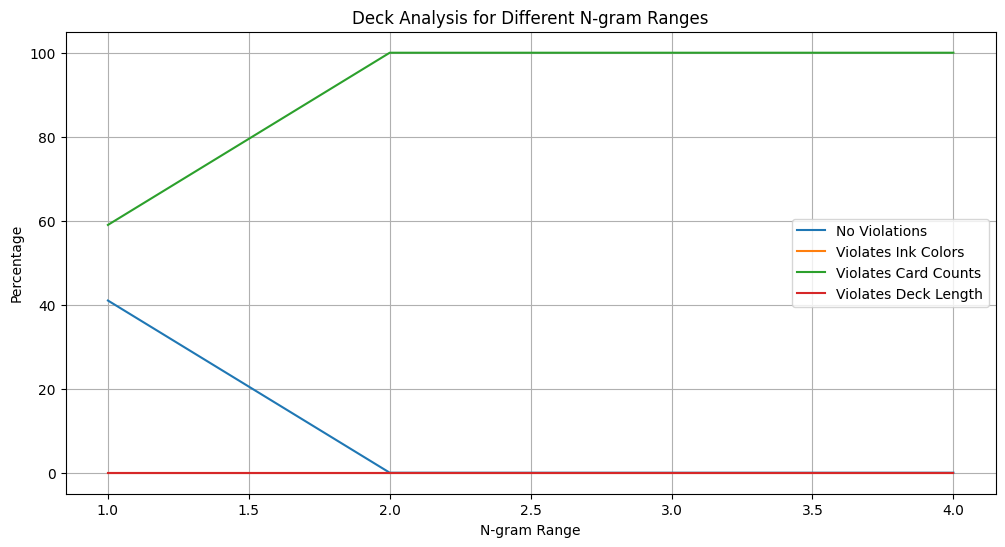


Best N-gram Range: 1.0
Percentage of decks with no violations: 41.00%
Percentage of decks violating ink color constraint: 0.00%
Percentage of decks violating card count constraint: 59.00%
Percentage of decks with less than 60 cards: 0.00%


In [59]:
results = []

for n in range(1, 5):
    print(f"Training and analyzing for n-grams: {n}")

    # Create a CountVectorizer with n-grams (e.g., unigrams to n-grams)
    ngram_vectorizer = CountVectorizer(ngram_range=(1, n), tokenizer=custom_tokenizer, lowercase=False)
    X_ngrams = ngram_vectorizer.fit_transform(decks_as_strings)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ngrams, y, test_size=0.2, random_state=42)

    # Train a RandomForestClassifier (as an example, you can use other models as well)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Analyze generated decks
    analysis_result = analyze_generated_decks(ngram_vectorizer, model, int_to_card, card_to_ink)
    results.append((n, analysis_result))

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame([
    {'n': n, **result}
    for n, result in results
])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df['n'], results_df['percent_no_violations'], label='No Violations')
plt.plot(results_df['n'], results_df['percent_violating_ink_colors'], label='Violates Ink Colors')
plt.plot(results_df['n'], results_df['percent_violating_card_counts'], label='Violates Card Counts')
plt.plot(results_df['n'], results_df['percent_violating_deck_length'], label='Violates Deck Length')
plt.xlabel('N-gram Range')
plt.ylabel('Percentage')
plt.title('Deck Analysis for Different N-gram Ranges')
plt.legend()
plt.grid(True)
plt.show()

# Print the results for the n-grams with the highest percentage of no violations
best_n = results_df.loc[results_df['percent_no_violations'].idxmax()]
print(f"\nBest N-gram Range: {best_n['n']}")
print(f"Percentage of decks with no violations: {best_n['percent_no_violations']:.2f}%")
print(f"Percentage of decks violating ink color constraint: {best_n['percent_violating_ink_colors']:.2f}%")
print(f"Percentage of decks violating card count constraint: {best_n['percent_violating_card_counts']:.2f}%")
print(f"Percentage of decks with less than 60 cards: {best_n['percent_violating_deck_length']:.2f}%")


# Bag of words but SHUFFLED!!!!!!

The idea here was to shuffle the cards and then if we shuffle them then we won't get as many repeats

In [60]:
import numpy as np
from collections import Counter
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Shuffle the decks
for deck in decks:
    random.shuffle(deck)

# Flatten the deck lists and get unique cards
unique_cards = list(set(card for deck in decks for card in deck))

# Create a mapping from card names to integers
card_to_int = {card: idx for idx, card in enumerate(unique_cards)}
int_to_card = {idx: card for card, idx in card_to_int.items()}

# Convert decks to integer representation
encoded_decks = [[card_to_int[card] for card in deck] for deck in decks]

# Convert each deck to a string of comma-separated integers
decks_as_strings = [','.join(map(str, deck)) for deck in encoded_decks]

# Custom tokenizer to split by commas
def custom_tokenizer(text):
    return text.split(',')

# Define the helper functions
from collections import Counter
import random
import matplotlib.pyplot as plt

# Function to get the ink color distribution of a deck
def get_ink_colors(deck, card_to_ink):
    ink_colors = [card_to_ink.get(card, 'Unknown') for card in deck]  # Use 'Unknown' if card not found
    return set(ink_colors)

# Function to check the properties of a deck
def analyze_deck(deck, card_to_ink):
    if not deck:
        print("Empty deck encountered!")
        return 0, 0, 0  # Return 0 ink colors, 0 max count, and length 0 for empty decks

    ink_colors = get_ink_colors(deck, card_to_ink)
    num_ink_colors = len(ink_colors)

    # Count the occurrences of each card
    card_counts = Counter(deck)
    max_count_per_card = max(card_counts.values()) if card_counts else 0

    return num_ink_colors, max_count_per_card, len(deck)

# Function to generate a new deck
def generate_new_deck(vectorizer, model, int_to_card, num_cards=60):
    # Sample a point from the feature space (simulated prediction)
    random_vector = random.choice(X_train.toarray())

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Decode the feature vector to card names
    new_deck = []
    for idx, count in enumerate(random_vector):
        if count > 0:
            ngram = feature_names[idx]
            if ' ' in ngram:
                cards = [int_to_card[int(i)] for i in ngram.split()]
                for card in cards:
                    new_deck.append(card)
            else:
                card = int_to_card[int(ngram)]
                new_deck.extend([card] * count)

    return new_deck[:num_cards]

# Function to generate multiple decks and analyze them
def analyze_generated_decks(vectorizer, model, int_to_card, card_to_ink, num_decks=100, num_cards=60):
    generated_decks = [generate_new_deck(vectorizer, model, int_to_card, num_cards=num_cards) for _ in range(num_decks)]

    decks_with_too_many_ink_colors = 0
    decks_with_too_many_of_one_card = 0
    decks_with_less_than_60_cards = 0
    decks_with_no_violations = 0
    deck_analysis_data = []

    for deck in generated_decks:
        if not deck:
            print("Empty deck generated!")
            continue

        num_ink_colors, max_count_per_card, deck_length = analyze_deck(deck, card_to_ink)

        deck_analysis_data.append({
            'num_ink_colors': num_ink_colors,
            'max_count_per_card': max_count_per_card,
            'deck_length': deck_length,
            'valid': num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60
        })

        # Check for violations
        if num_ink_colors > 2:
            decks_with_too_many_ink_colors += 1
            print(f"Deck violates ink color constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")
            print(f"Max count per card: {max_count_per_card}")
            print(f"Number of cards: {deck_length}")

        if max_count_per_card > 4:
            decks_with_too_many_of_one_card += 1
            print(f"Deck violates card count constraint: {deck}")
            print(f"Number of ink colors: {num_ink_colors}")
            print(f"Max count per card: {max_count_per_card}")
            print(f"Number of cards: {deck_length}")

        if deck_length < 60:
            decks_with_less_than_60_cards += 1
            print(f"Deck violates card count constraint (less than 60 cards): {deck}")
            print(f"Number of ink colors: {num_ink_colors}")
            print(f"Max count per card: {max_count_per_card}")
            print(f"Number of cards: {deck_length}")

        if num_ink_colors <= 2 and max_count_per_card <= 4 and deck_length == 60:
            decks_with_no_violations += 1

    total_decks = num_decks
    percent_violating_ink_colors = (decks_with_too_many_ink_colors / total_decks) * 100
    percent_violating_card_counts = (decks_with_too_many_of_one_card / total_decks) * 100
    percent_violating_deck_length = (decks_with_less_than_60_cards / total_decks) * 100
    percent_no_violations = (decks_with_no_violations / total_decks) * 100

    print(f"\nPercentage of decks violating ink color constraint: {percent_violating_ink_colors:.2f}%")
    print(f"Percentage of decks violating card count constraint: {percent_violating_card_counts:.2f}%")
    print(f"Percentage of decks with less than 60 cards: {percent_violating_deck_length:.2f}%")
    print(f"Percentage of decks with no violations: {percent_no_violations:.2f}%")

    return {
        'percent_no_violations': percent_no_violations,
        'percent_violating_ink_colors': percent_violating_ink_colors,
        'percent_violating_card_counts': percent_violating_card_counts,
        'percent_violating_deck_length': percent_violating_deck_length,
        'deck_analysis_data': deck_analysis_data
    }


We ended up getting basically the same amount, since even though they arent in the same order, thtey are still ending up in the larger ngrams and thus still repeated since it samples from the same deck

Training and analyzing for n-grams: 2


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ['Launch', 'Launch', 'Launch', 'Launch', 'Launch', 'Dewey - Showy Nephew', 'Launch', 'Develop Your Brain', 'Launch', 'Ursula - Deceiver', 'Launch', 'Eye Of The Fates', 'Dewey - Showy Nephew', 'Dewey - Showy Nephew', 'Dewey - Showy Nephew', 'Hades - Infernal Schemer', 'Dewey - Showy Nephew', 'Repair', 'Develop Your Brain', 'Develop Your Brain', 'Develop Your Brain', 'Launch', 'Develop Your Brain', 'Belle - Inventive Engineer', 'Caterpillar - Calm and Collected', 'Caterpillar - Calm and Collected', 'Caterpillar - Calm and Collected', 'Caterpillar - Calm and Collected', 'Caterpillar - Calm and Collected', 'Caterpillar - Calm and Collected', 'Caterpillar - Calm and Collected', 'Coconut Basket', 'Caterpillar - Calm and Collected', "Dr. Facilier's Cards", 'Hades - Infernal Schemer', 'Hades - Infernal Schemer', 'Hades - Infernal Schemer', 'Hades - Infernal Schemer', 'Hades - Infernal Schemer', 'Fang - River City', 'Hades - Infernal Schemer', 'Mickey Mouse 

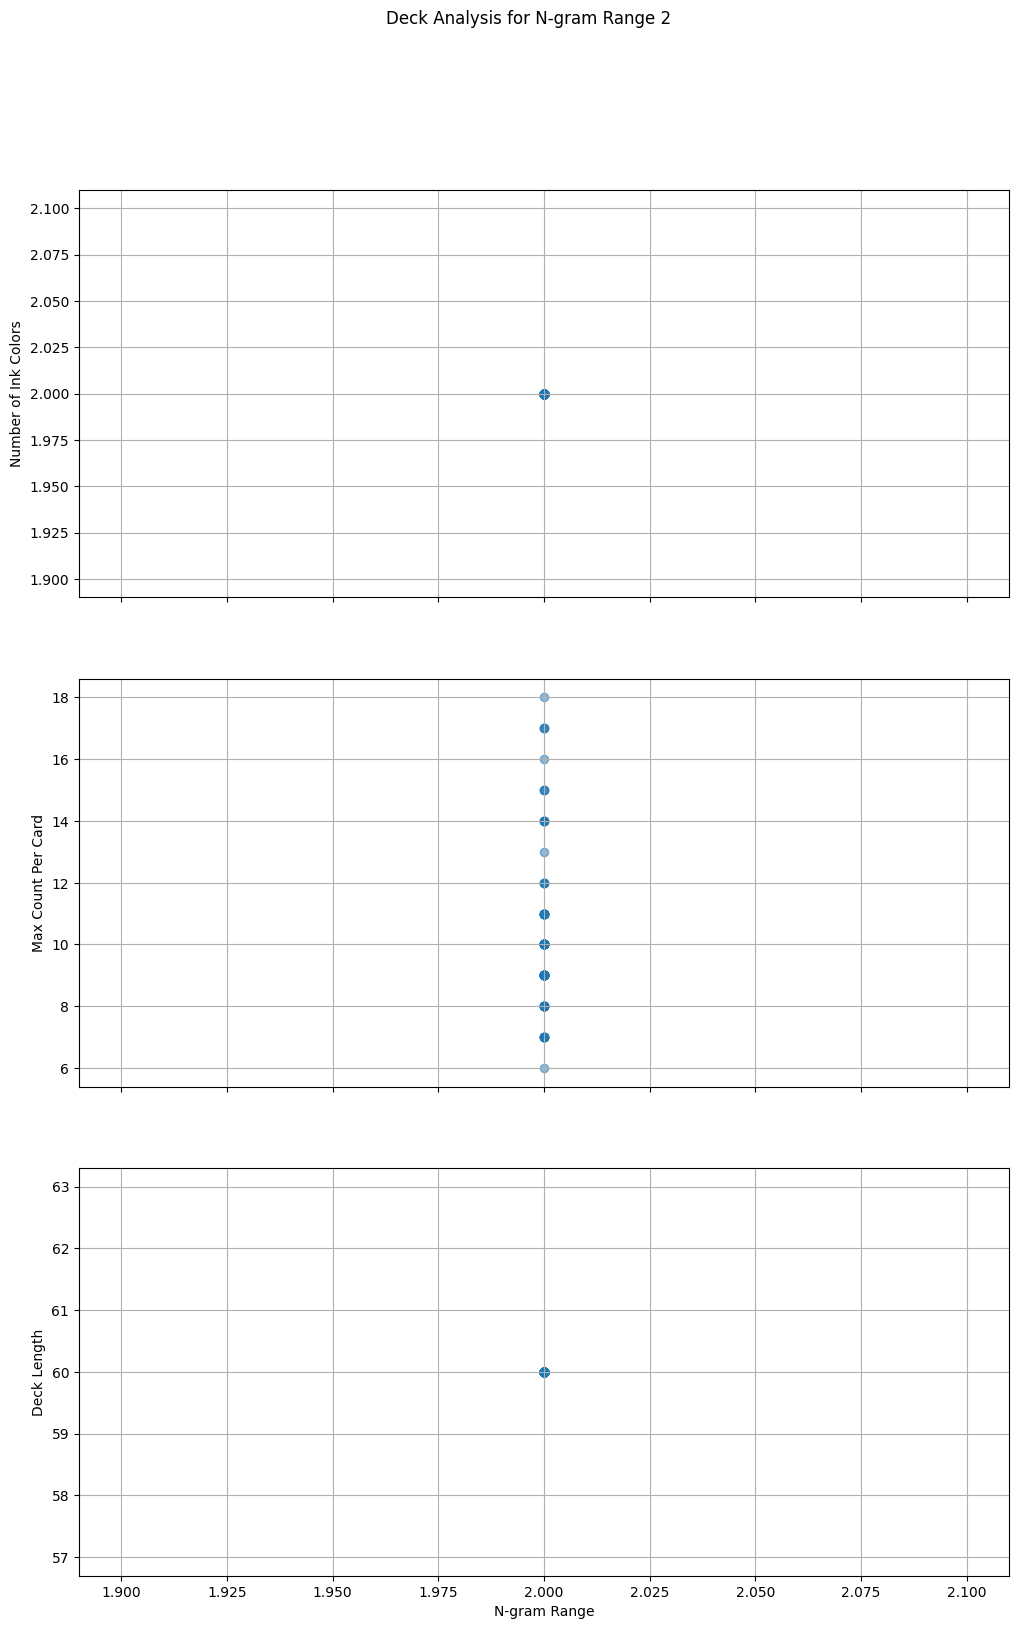

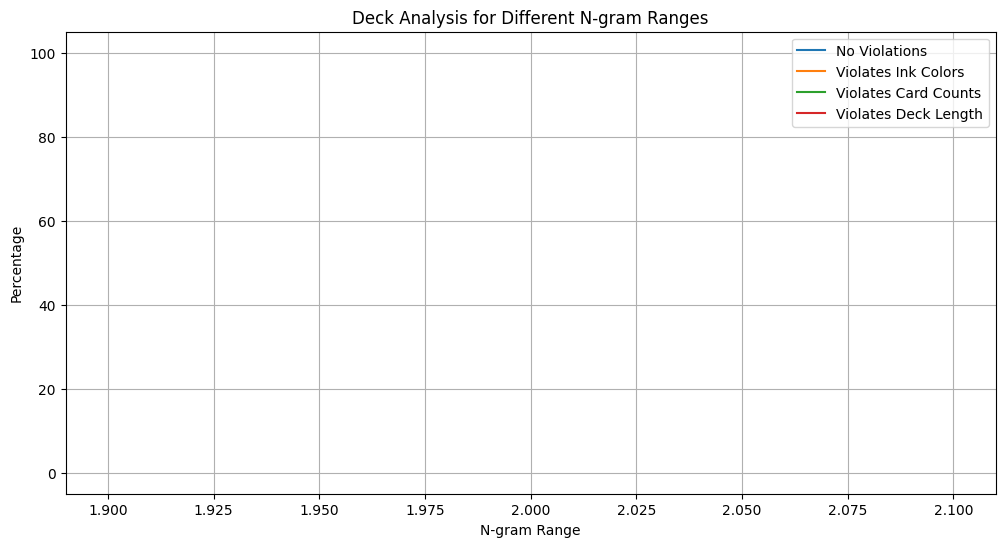


Best N-gram Range: 2
Percentage of decks with no violations: 0.00%
Percentage of decks violating ink color constraint: 0.00%
Percentage of decks violating card count constraint: 100.00%
Percentage of decks with less than 60 cards: 0.00%


In [61]:
results = []
y = [1] * len(decks)
for n in range(2, 3):
    print(f"Training and analyzing for n-grams: {n}")

    # Create a CountVectorizer with n-grams (e.g., unigrams to n-grams)
    ngram_vectorizer = CountVectorizer(ngram_range=(1, n), tokenizer=custom_tokenizer, lowercase=False)
    X_ngrams = ngram_vectorizer.fit_transform(decks_as_strings)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ngrams, y, test_size=0.2, random_state=42)

    # Train a RandomForestClassifier (as an example, you can use other models as well)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Analyze generated decks
    analysis_result = analyze_generated_decks(ngram_vectorizer, model, int_to_card, card_to_ink)
    results.append((n, analysis_result))

    # Plot detailed analysis data for the current n-gram iteration
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
    deck_data = analysis_result['deck_analysis_data']
    num_ink_colors = [d['num_ink_colors'] for d in deck_data]
    max_count_per_card = [d['max_count_per_card'] for d in deck_data]
    deck_length = [d['deck_length'] for d in deck_data]

    axes[0].scatter([n] * len(deck_data), num_ink_colors, alpha=0.5)
    axes[0].set_ylabel('Number of Ink Colors')

    axes[1].scatter([n] * len(deck_data), max_count_per_card, alpha=0.5)
    axes[1].set_ylabel('Max Count Per Card')

    axes[2].scatter([n] * len(deck_data), deck_length, alpha=0.5)
    axes[2].set_ylabel('Deck Length')
    axes[2].set_xlabel('N-gram Range')

    for ax in axes:
        ax.grid(True)

    plt.suptitle(f'Deck Analysis for N-gram Range {n}')
    plt.show()
    plt.close(fig)

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame([
    {'n': n, **result}
    for n, result in results
])

# Plot the summary results
plt.figure(figsize=(12, 6))
plt.plot(results_df['n'], results_df['percent_no_violations'], label='No Violations')
plt.plot(results_df['n'], results_df['percent_violating_ink_colors'], label='Violates Ink Colors')
plt.plot(results_df['n'], results_df['percent_violating_card_counts'], label='Violates Card Counts')
plt.plot(results_df['n'], results_df['percent_violating_deck_length'], label='Violates Deck Length')
plt.xlabel('N-gram Range')
plt.ylabel('Percentage')
plt.title('Deck Analysis for Different N-gram Ranges')
plt.legend()
plt.grid(True)
plt.savefig('ngram_summary_analysis.png')
plt.show()

# Print the results for the n-grams with the highest percentage of no violations
best_n = results_df.loc[results_df['percent_no_violations'].idxmax()]
print(f"\nBest N-gram Range: {best_n['n']}")
print(f"Percentage of decks with no violations: {best_n['percent_no_violations']:.2f}%")
print(f"Percentage of decks violating ink color constraint: {best_n['percent_violating_ink_colors']:.2f}%")
print(f"Percentage of decks violating card count constraint: {best_n['percent_violating_card_counts']:.2f}%")
print(f"Percentage of decks with less than 60 cards: {best_n['percent_violating_deck_length']:.2f}%")


# Bag of words with more! (Logistic Regression)

Here we tried a different type of algorithm for the bag of words, hopefully more complex but it still ended up with similar results

Training and analyzing for n-grams: 1
Deck violates card count constraint: ['John Silver - Greedy Treasure Seeker', 'Lucifer - Cunning Cat', 'Goofy - Knight for a Day', 'Goofy - Knight for a Day', 'Goofy - Knight for a Day', 'Minnie Mouse - Funky Spelunker', 'Minnie Mouse - Funky Spelunker', 'Chief Bogo - Respected Officer', 'Chief Bogo - Respected Officer', 'Chief Bogo - Respected Officer', 'Chief Bogo - Respected Officer', 'Jetsam - Riffraff', 'Mother Knows Best', 'Mother Knows Best', 'Mother Knows Best', 'Donald Duck - Perfect Gentleman', 'Donald Duck - Perfect Gentleman', 'Donald Duck - Perfect Gentleman', 'Beast - Forbidding Recluse', 'Beast - Forbidding Recluse', 'Beast - Forbidding Recluse', 'Beast - Forbidding Recluse', 'Beast - Forbidding Recluse', 'Beast - Forbidding Recluse', 'Beast - Forbidding Recluse', 'Rise Of The Titans', 'Has Set My Heaaaaaaart . . .', 'Has Set My Heaaaaaaart . . .', 'Cinderella - Stouthearted', 'Lawrence - Jealous Manservant', 'Smash', 'Smash', 'Smash

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


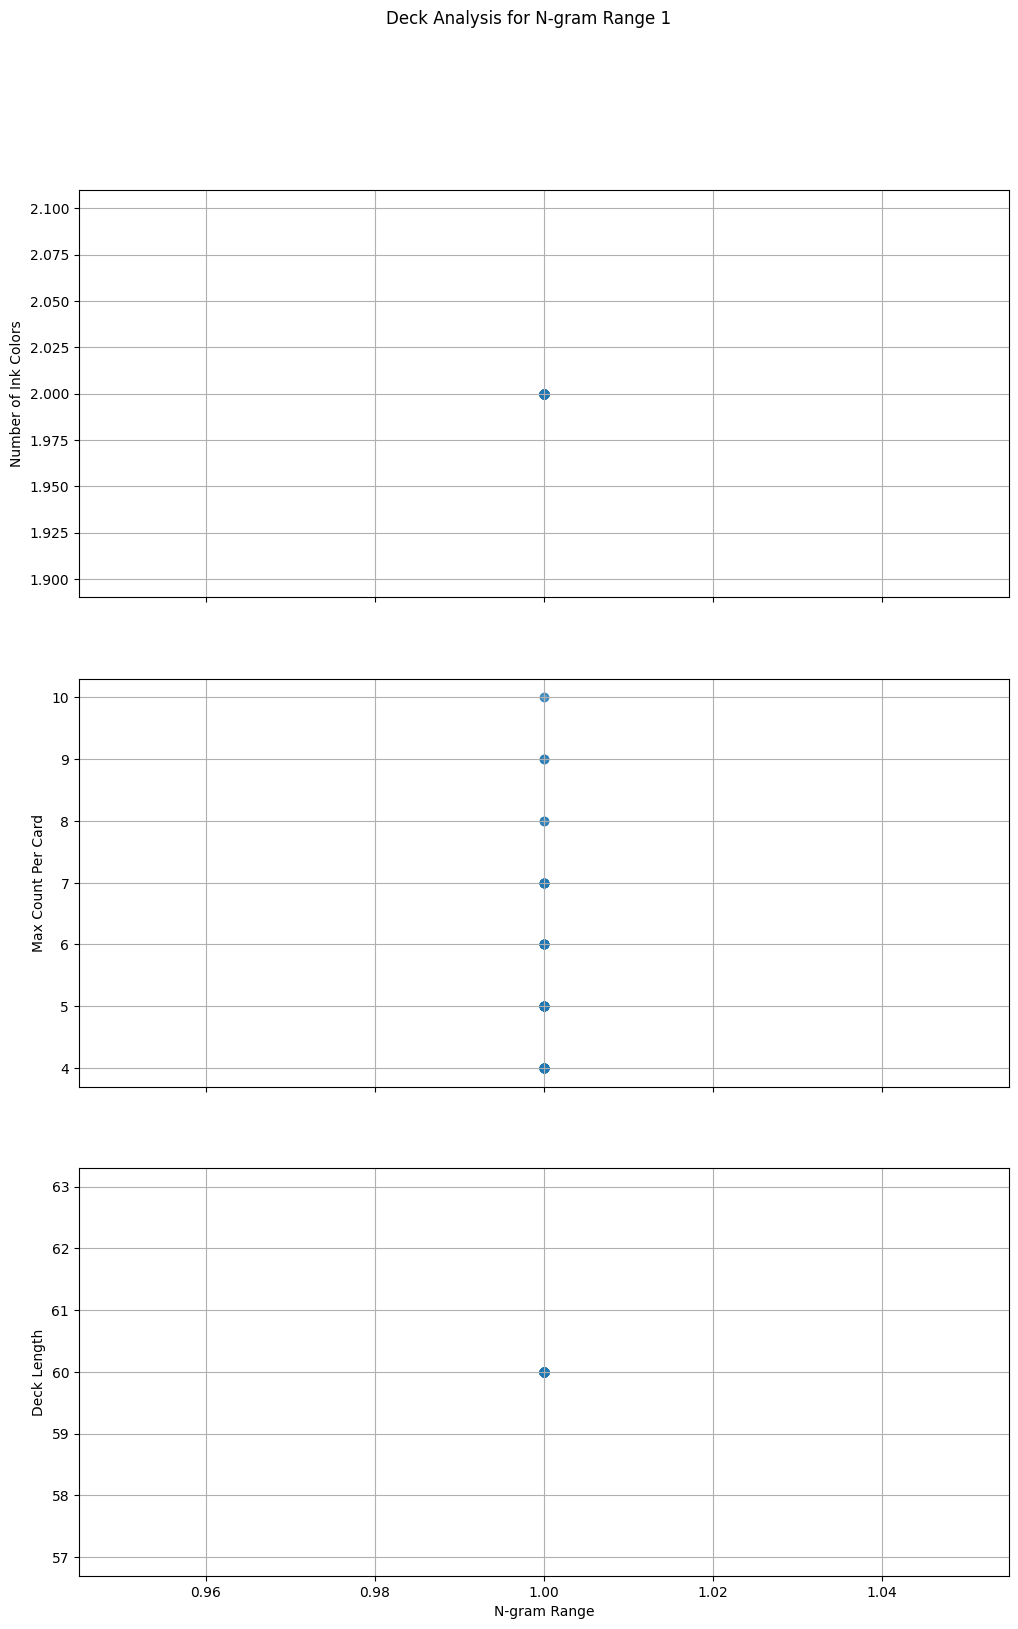

Training and analyzing for n-grams: 2


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ['Lucifer - Cunning Cat', 'Lucifer - Cunning Cat', 'Lucifer - Cunning Cat', 'Rapunzel - Gifted with Healing', 'Lucifer - Cunning Cat', 'Lefou - Bumbler', 'Peter Pan - Never Landing', 'Peter Pan - Never Landing', 'Peter Pan - Never Landing', 'Peter Pan - Never Landing', "Wildcat's Wrench", 'Peter Pan - Never Landing', 'Peter Pan - Lost Boy Leader', 'Peter Pan - Never Landing', 'You Have Forgotten Me', 'Milo Thatch - Clever Cartographer', 'Milo Thatch - Clever Cartographer', 'Milo Thatch - Clever Cartographer', 'Milo Thatch - Clever Cartographer', "Wildcat's Wrench", 'Milo Thatch - Clever Cartographer', 'Genie - The Ever Impressive', 'Rapunzel - Gifted with Healing', 'Rapunzel - Gifted with Healing', 'Minnie Mouse - Beloved Princess', 'Minnie Mouse - Beloved Princess', 'Minnie Mouse - Beloved Princess', 'Minnie Mouse - Beloved Princess', 'Minnie Mouse - Beloved Princess', 'Minnie Mouse - Beloved Princess', 'Lucifer - Cunning Cat', 'Minnie Mouse - Belo

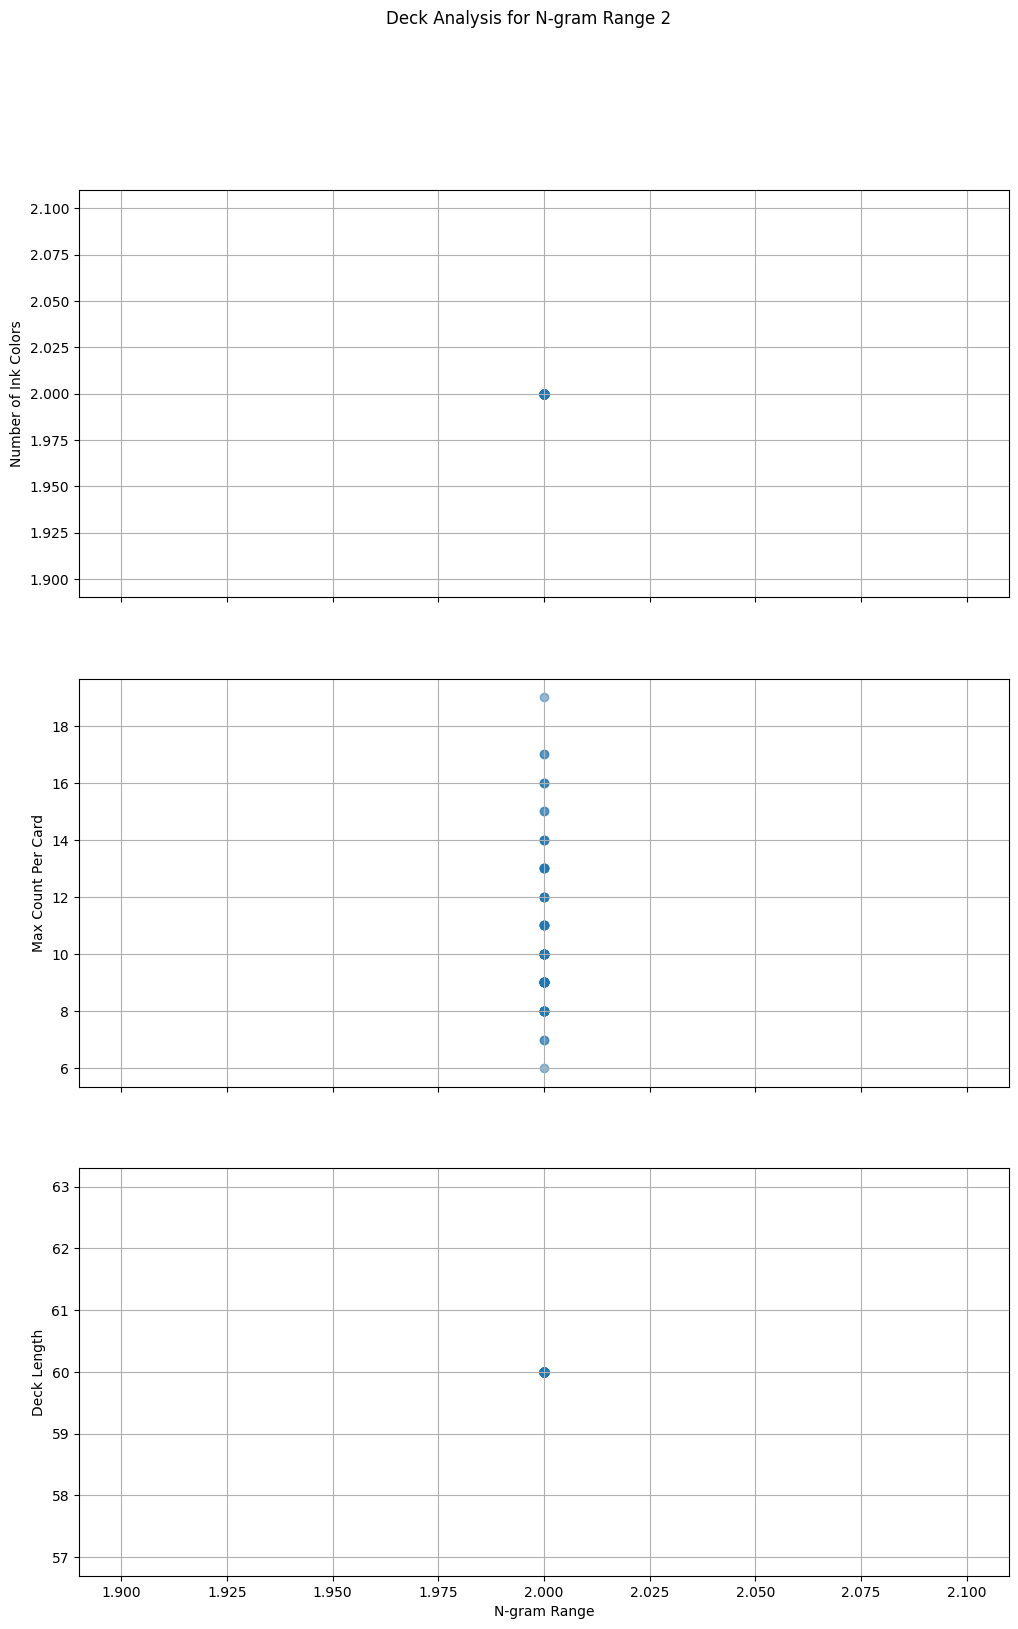

Training and analyzing for n-grams: 3


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ['Peter Pan - Fearless Fighter', 'Peter Pan - Fearless Fighter', 'Peter Pan - Fearless Fighter', 'Donald Duck - Boisterous Fowl', 'Peter Pan - Fearless Fighter', 'Donald Duck - Boisterous Fowl', 'Skippy - Energetic Rabbit', 'Peter Pan - Fearless Fighter', 'Kakamora - Menacing Sailor', 'Peter Pan - Fearless Fighter', 'Kakamora - Menacing Sailor', 'Peter Pan - Fearless Fighter', 'Shield Of Virtue', 'Shield Of Virtue', 'Shield Of Virtue', 'Dragon Fire', 'Shield Of Virtue', 'Dragon Fire', 'Donald Duck - Boisterous Fowl', 'Shield Of Virtue', 'Mother Gothel - Selfish Manipulator', 'Shield Of Virtue', 'Mother Gothel - Selfish Manipulator', 'The Queen - Disguised Peddler', 'Belle - Hidden Archer', 'Belle - Hidden Archer', 'Belle - Hidden Archer', 'Belle - Hidden Archer', 'Donald Duck - Boisterous Fowl', 'Belle - Hidden Archer', 'Donald Duck - Boisterous Fowl', 'Kit Cloudkicker - Tough Guy', 'Belle - Hidden Archer', 'Be Prepared', 'Belle - Hidden Archer', 'B

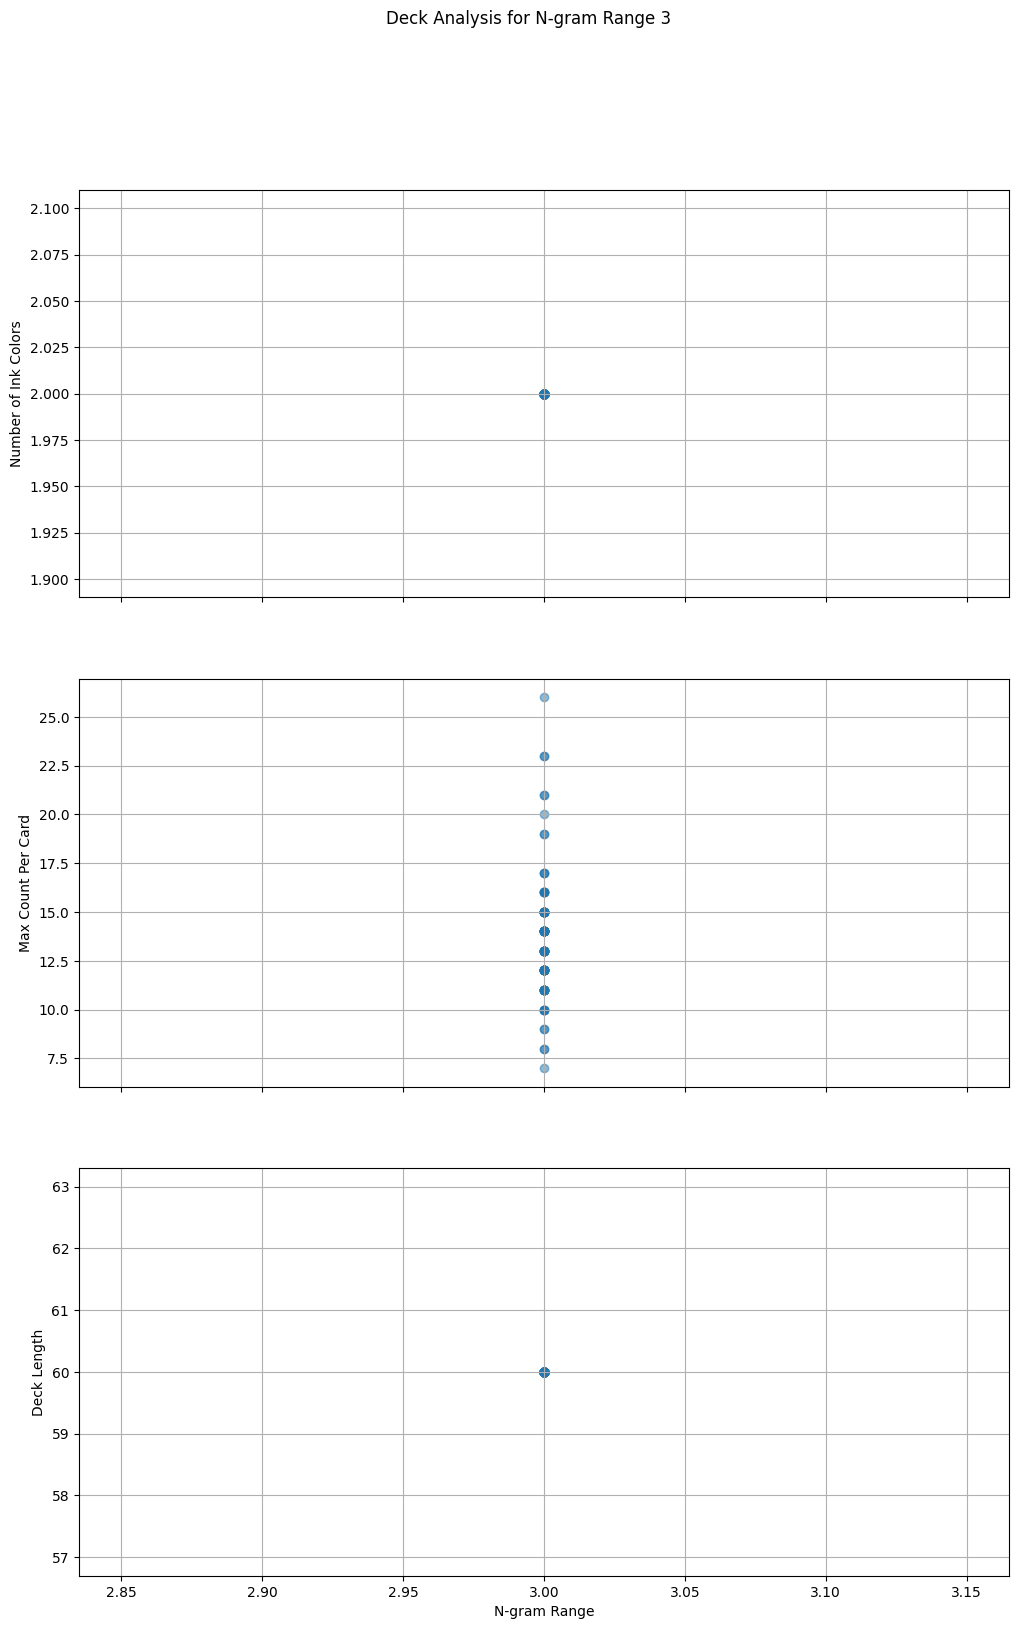

Training and analyzing for n-grams: 4


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Deck violates card count constraint: ['Launch', 'Launch', 'Audrey Ramirez - The Engineer', 'Launch', 'Audrey Ramirez - The Engineer', 'One Jump Ahead', 'Launch', 'Audrey Ramirez - The Engineer', 'One Jump Ahead', 'Jafar - Royal Vizier', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'John Silver - Greedy Treasure Seeker', 'Launch', 'John Silver - Greedy Treasure Seeker', 'Launch', 'Audrey Ramirez - The Engineer', 'John Silver - Greedy Treasure Seeker', 'Launch', 'Audrey Ramirez - The Engineer', 'One Jump Ahead', 'John Silver - Greedy Treasure Seeker', 'Alice - Growing Girl', 'John Silver - Greedy Treasure Seeker', 'Alice - Growing Girl', "Belle's House - Maurice's Workshop", 'John Silver - Greedy Treasure Seeker', 'Alice - Growing Girl', "Belle's House - Maurice's Workshop", 'Gustav the Giant - Terror of the Kingdom', 'John Silver - Greedy Treasure Seeker', 'Chief Tui - Resp

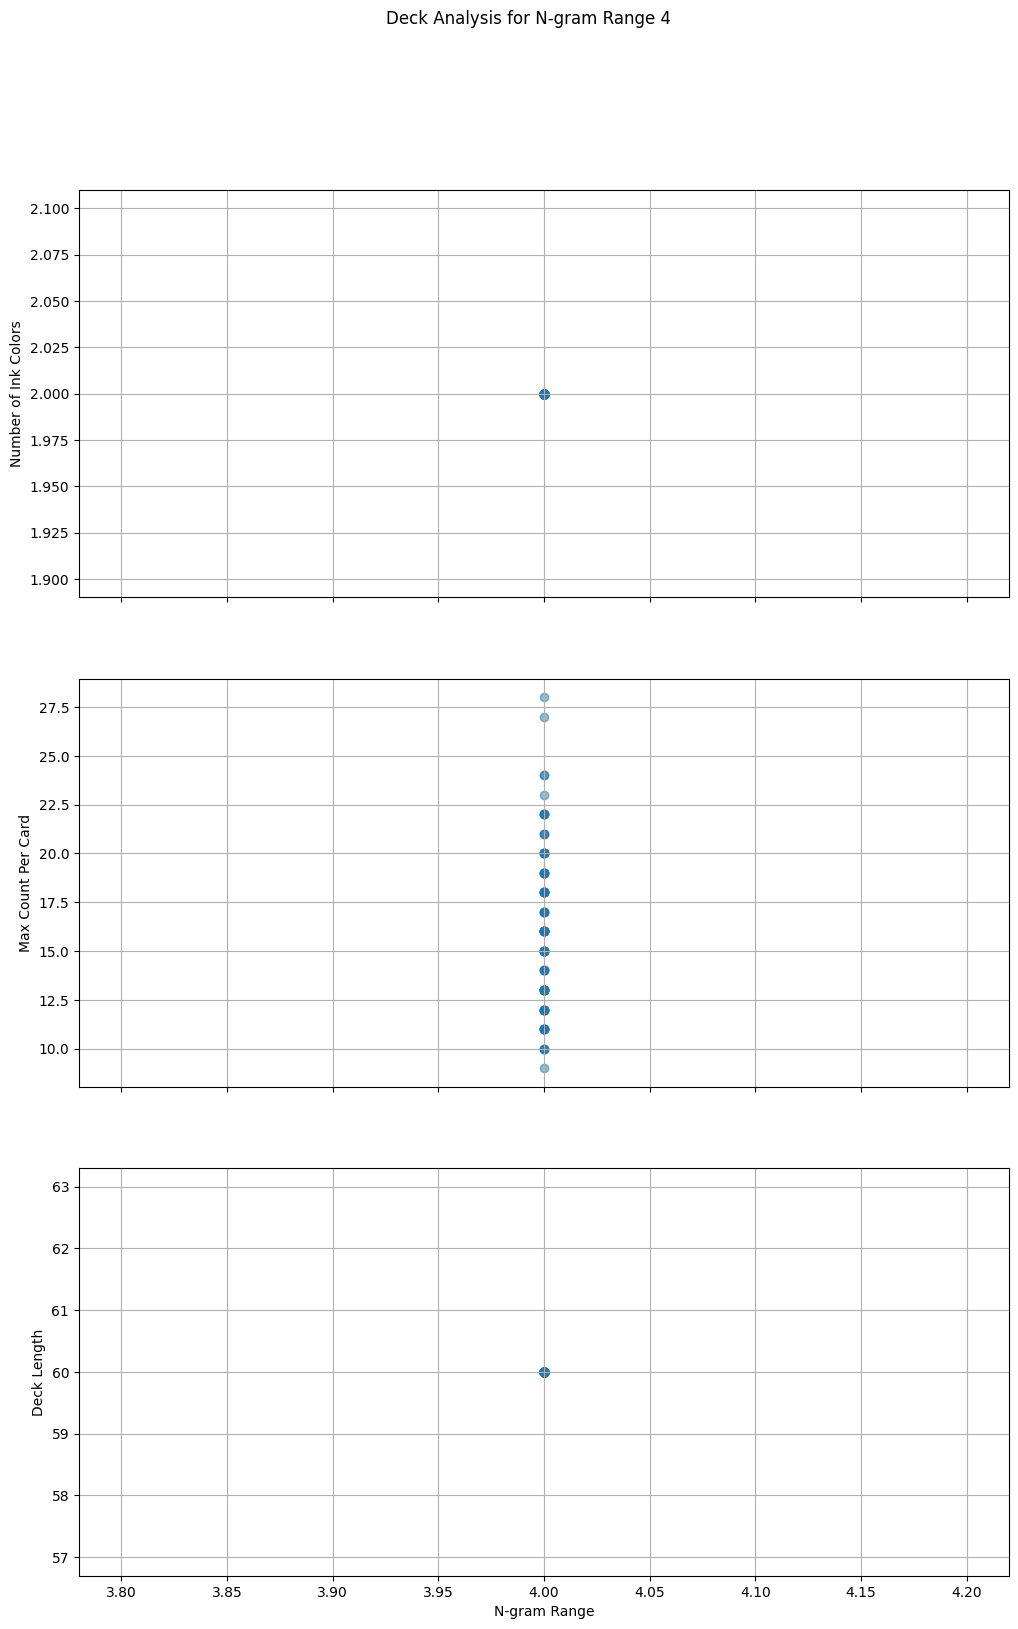

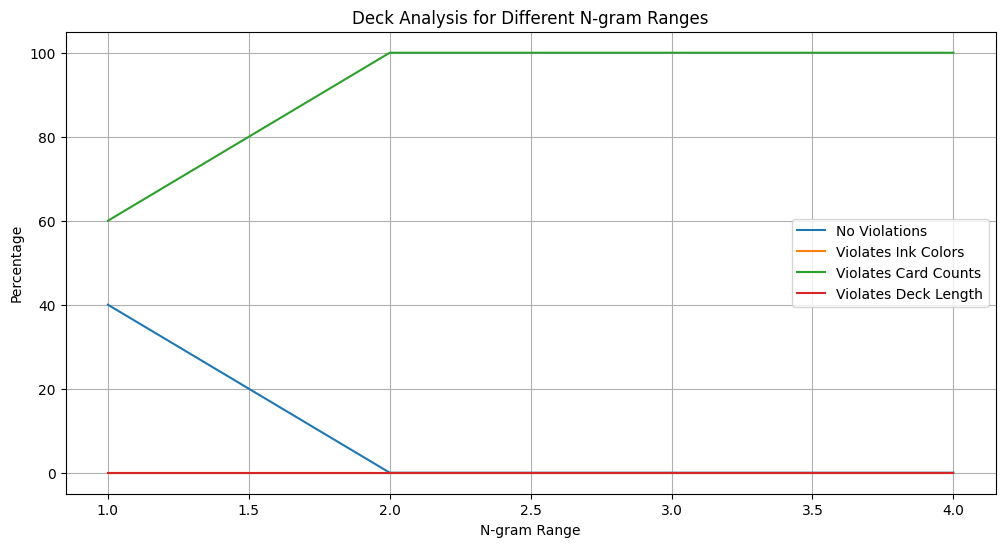


Best N-gram Range: 1
Percentage of decks with no violations: 40.00%
Percentage of decks violating ink color constraint: 0.00%
Percentage of decks violating card count constraint: 60.00%
Percentage of decks with less than 60 cards: 0.00%


In [62]:
from sklearn.naive_bayes import MultinomialNB

results = []
y = [1] * len(decks)  # Dummy target values

for n in range(1, 5):
    print(f"Training and analyzing for n-grams: {n}")

    # Create a CountVectorizer with n-grams (e.g., unigrams to n-grams)
    ngram_vectorizer = CountVectorizer(ngram_range=(1, n), tokenizer=custom_tokenizer, lowercase=False)
    X_ngrams = ngram_vectorizer.fit_transform(decks_as_strings)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ngrams, y, test_size=0.2, random_state=42)

    # Train a MultinomialNB model
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Analyze generated decks
    analysis_result = analyze_generated_decks(ngram_vectorizer, model, int_to_card, card_to_ink)
    results.append((n, analysis_result))

    # Plot detailed analysis data for the current n-gram iteration
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
    deck_data = analysis_result['deck_analysis_data']
    num_ink_colors = [d['num_ink_colors'] for d in deck_data]
    max_count_per_card = [d['max_count_per_card'] for d in deck_data]
    deck_length = [d['deck_length'] for d in deck_data]

    axes[0].scatter([n] * len(deck_data), num_ink_colors, alpha=0.5)
    axes[0].set_ylabel('Number of Ink Colors')

    axes[1].scatter([n] * len(deck_data), max_count_per_card, alpha=0.5)
    axes[1].set_ylabel('Max Count Per Card')

    axes[2].scatter([n] * len(deck_data), deck_length, alpha=0.5)
    axes[2].set_ylabel('Deck Length')
    axes[2].set_xlabel('N-gram Range')

    for ax in axes:
        ax.grid(True)

    plt.suptitle(f'Deck Analysis for N-gram Range {n}')
    plt.show()
    plt.close(fig)

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame([
    {'n': n, **result}
    for n, result in results
])

# Plot the summary results
plt.figure(figsize=(12, 6))
plt.plot(results_df['n'], results_df['percent_no_violations'], label='No Violations')
plt.plot(results_df['n'], results_df['percent_violating_ink_colors'], label='Violates Ink Colors')
plt.plot(results_df['n'], results_df['percent_violating_card_counts'], label='Violates Card Counts')
plt.plot(results_df['n'], results_df['percent_violating_deck_length'], label='Violates Deck Length')
plt.xlabel('N-gram Range')
plt.ylabel('Percentage')
plt.title('Deck Analysis for Different N-gram Ranges')
plt.legend()
plt.grid(True)
plt.savefig('ngram_summary_analysis.png')
plt.show()

# Print the results for the n-grams with the highest percentage of no violations
best_n = results_df.loc[results_df['percent_no_violations'].idxmax()]
print(f"\nBest N-gram Range: {best_n['n']}")
print(f"Percentage of decks with no violations: {best_n['percent_no_violations']:.2f}%")
print(f"Percentage of decks violating ink color constraint: {best_n['percent_violating_ink_colors']:.2f}%")
print(f"Percentage of decks violating card count constraint: {best_n['percent_violating_card_counts']:.2f}%")
print(f"Percentage of decks with less than 60 cards: {best_n['percent_violating_deck_length']:.2f}%")


Bag of words + LSTM